---

- Context
- Exploratory Data Analysis :
    - Environnement Set Up
    - Data Loading
    - Descriptive Statistics
    - Data Viz & Analysis

# Context
In order to measure and analyse customer churn for PowerCo, i will explore some data provided by the client.
Based on previous experience, one key reason why customer churn is price sensitivity. I will explore this hypothesis and see if it valid or not using machine learning.

### Price Sensitivity
Price sensitivity is commonly measured using the price elasticity of demand, which states that some consumers won't pay more if a lower-priced option is available. In other words, Price Sensitivity is the degree to which demand changes when the cost of a product or a service changes.

# Exploratory Data Analysis

## Setting up the environnement

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data

In this notebook i'm using two datasets provided by the client : `client_data.csv` and `price_data.csv`.

In [3]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

In [4]:
client_df.sample(10)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
6313,1d62d9457bd6cf219138e7f98bfde2cc,foosdfpfkusacimwkcsosbicdxkicaua,65020,0,3315,2012-08-11,2016-04-01,2015-04-01,2014-10-19,9254.64,...,f,473.09,115.84,115.84,2,456.34,3,lxidpiddsbxsbosboudacockeimpuepw,35.000,0
1158,cac7c644f0deba2079308403ae39c005,foosdfpfkusacimwkcsosbicdxkicaua,3926060,1959386,469210,2011-10-22,2016-10-22,2011-10-22,2015-10-23,366.48,...,t,0.00,28.76,28.76,2,43.71,4,lxidpiddsbxsbosboudacockeimpuepw,13.856,0
11325,7787d6ed08b7c559f57b9a23e35779f3,foosdfpfkusacimwkcsosbicdxkicaua,342248,0,14357,2012-03-05,2016-03-05,2012-03-05,2015-03-06,0.18,...,f,0.00,27.26,27.26,1,35.30,4,lxidpiddsbxsbosboudacockeimpuepw,11.950,0
3581,ee66964018b1fb103062c78905c7e5be,foosdfpfkusacimwkcsosbicdxkicaua,1394918,0,75133,2011-06-16,2016-06-16,2011-06-16,2015-06-22,0.00,...,f,0.00,0.12,0.12,1,0.00,5,lxidpiddsbxsbosboudacockeimpuepw,14.490,0
679,604f63aa1b5f690b43c8b6faae62f61c,MISSING,25917,0,2008,2010-02-01,2016-02-01,2010-02-01,2015-02-02,2194.37,...,f,193.75,39.60,39.60,2,240.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,26.400,0
11941,fd2640ba60b595c4e1e06bca8c9707fe,foosdfpfkusacimwkcsosbicdxkicaua,633,0,122,2012-10-04,2016-11-12,2014-11-12,2015-11-13,93.82,...,f,17.95,26.73,26.73,1,10.30,3,ldkssxwpmemidmecebumciepifcamkci,13.200,0
834,73db84a2692884d70436a2a496680527,foosdfpfkusacimwkcsosbicdxkicaua,78574,0,6389,2013-02-01,2016-02-01,2013-02-01,2015-02-09,6870.98,...,f,623.72,27.60,27.60,2,697.02,3,lxidpiddsbxsbosboudacockeimpuepw,27.710,0
6048,ffd81a648a4394d296acca247eb81019,usilxuppasemubllopkaafesmlibmsdf,48442,0,2430,2012-12-12,2016-12-12,2015-11-01,2015-12-14,2306.34,...,f,0.00,3.56,3.56,1,186.29,3,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
1761,b40c3ca7f770d1dd0d541e5af958d820,foosdfpfkusacimwkcsosbicdxkicaua,124250,0,8023,2012-03-02,2016-03-02,2012-03-02,2015-03-06,626.11,...,f,0.00,34.56,34.56,1,74.99,4,lxidpiddsbxsbosboudacockeimpuepw,15.220,0
8686,12902175e37fa9c3719f8eee652aac7e,foosdfpfkusacimwkcsosbicdxkicaua,0,193458,0,2009-09-07,2016-09-07,2009-09-07,2015-09-08,0.00,...,t,0.00,17.93,17.93,2,0.00,6,lxidpiddsbxsbosboudacockeimpuepw,20.000,0


In [5]:
price_df.sample(10)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
82706,1ead1c2afba1c19c4030f0dd4808ecfd,2015-09-01,0.146788,0.000000,0.000000,44.444710,0.000000,0.000000
168915,fea34b3890e73a769e63f6db312b016a,2015-10-01,0.117595,0.099911,0.073936,40.728885,24.437330,16.291555
112102,93efa5f6e406b4569e45c36ad0c0a4a5,2015-05-01,0.127566,0.105428,0.073487,40.565969,24.339581,16.226389
54507,08b10a62c478b79cff03ca0f63b4035a,2015-02-01,0.151635,0.000000,0.000000,44.266931,0.000000,0.000000
64359,588681c8ab2976944b7e4acb2d58ea66,2015-09-01,0.116424,0.098191,0.070237,40.728885,24.437330,16.291555
165613,0d935a284bafde95ca1e649b95a1de45,2015-06-01,0.151635,0.000000,0.000000,44.266930,0.000000,0.000000
45830,34c2ad7336165634edbeb11063758bf4,2015-08-01,0.119426,0.101266,0.073424,40.565973,24.339578,16.226383
104141,ea3ec53734ef7cd26cfb08ee38832f76,2015-01-01,0.131549,0.109324,0.077255,40.728885,24.437330,16.291555
77436,c6f89167c1eb99c965ff1a27d6662689,2015-07-01,0.126336,0.104660,0.074570,40.728885,24.437330,16.291555
97598,cd43b1747496605c425891bb64701c10,2015-09-01,0.143943,0.000000,0.000000,44.444710,0.000000,0.000000


---

## Descriptive statistics of data

### Data types

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Observations
- Dates are present as pandas objects, we need to convert them to proper data types.
- There is some data missing in the 'channel_sales' and 'origin_up' columns that we should be cautious about.
- 'client_df' dataset has 14606 `unique` IDs while 'price_df' has 16096, meaning that we have 1490 more data about clients in the price section.

* As our goal is to analyze the relationship between customers churn and price sensitivity i will go straight to the point and start by merging the two datasets.

In [10]:
merged_df = pd.merge(client_df, price_df, on='id') # Default inner join to take only intersection of IDs between the two datasets.
merged_df.sample(10)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
129889,87c53cfbd4644a9fc572a95b7df6553b,foosdfpfkusacimwkcsosbicdxkicaua,44218,16243,2806,2012-01-25,2017-01-25,2014-12-17,2016-01-26,4507.49,...,ldkssxwpmemidmecebumciepifcamkci,25.000,0,2015-09-01,0.119906,0.101672,0.073719,40.728885,24.437330,16.291555
83956,5ee4fd24d352c085a78008beb882ec60,ewpakwlliwisiwduibdlfmalxowmwpci,64352,0,8752,2011-01-19,2016-02-16,2015-03-16,2015-02-18,2627.63,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,15.010,0,2015-08-01,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555
172311,acfc64a25aa08855407b467f2573cb3e,MISSING,9426,0,780,2010-01-16,2016-06-15,2015-06-15,2014-10-06,1743.77,...,lxidpiddsbxsbosboudacockeimpuepw,10.350,1,2015-04-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
66803,29e4c25276b52ede44c333720919cdec,foosdfpfkusacimwkcsosbicdxkicaua,174990,1159,5039,2013-02-23,2016-02-23,2013-02-23,2015-02-26,8859.74,...,lxidpiddsbxsbosboudacockeimpuepw,24.249,0,2015-07-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
25303,e5fe9cbd648c78291224e23d439ebba0,foosdfpfkusacimwkcsosbicdxkicaua,78404,0,6731,2012-05-10,2016-05-10,2014-04-23,2015-05-14,7765.74,...,lxidpiddsbxsbosboudacockeimpuepw,30.000,0,2015-09-01,0.117479,0.099794,0.073819,40.728885,24.437330,16.291555
99336,eea4450231d968e322a87a3635bc39e8,MISSING,1001492,159816,112397,2009-07-02,2016-06-17,2009-07-02,2015-06-23,4427.63,...,ldkssxwpmemidmecebumciepifcamkci,25.000,0,2015-08-01,0.118175,0.100491,0.074516,40.728885,24.437330,16.291555
56624,dd579cd1bff9f10a84d47b6f80a4072c,usilxuppasemubllopkaafesmlibmsdf,12994,0,1648,2010-12-28,2016-12-28,2015-11-16,2015-12-29,1414.51,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.321,0,2015-05-01,0.127555,0.105419,0.073478,40.565969,24.339581,16.226389
167525,0c001227ddc8c75399821ddefd668871,foosdfpfkusacimwkcsosbicdxkicaua,13710,0,1034,2012-01-10,2017-01-10,2012-01-10,2016-01-11,1377.55,...,lxidpiddsbxsbosboudacockeimpuepw,17.321,0,2015-01-01,0.130144,0.108020,0.074278,40.565969,24.339581,16.226389
57544,57993af7ae8d7c2bde0236eb20e6b492,MISSING,13981,0,0,2010-01-18,2016-03-02,2010-01-18,2015-03-06,1158.87,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,10.350,0,2015-07-01,0.171746,0.088815,0.000000,44.266930,0.000000,0.000000
58057,37ed8329b9a8715964c506d6b5b1a4d7,foosdfpfkusacimwkcsosbicdxkicaua,10304,0,0,2012-09-08,2016-09-08,2015-07-11,2015-09-09,577.84,...,lxidpiddsbxsbosboudacockeimpuepw,13.200,0,2015-04-01,0.150211,0.000000,0.000000,44.266931,0.000000,0.000000


Some data is labeled as 'MISSING' in channel_sales and origin_up columns. I will deal with this before building my model in features engineering part.

### Statistics

Now let's look at some statistics.

In [11]:
merged_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,1.751490e+05,1.751490e+05,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,...,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000
mean,1.592606e+05,2.808072e+04,16095.518404,1868.343884,1399.782380,0.967028,63.074649,0.137287,0.050487,43.130229,...,189.245305,4.998276,18.134896,0.097077,0.142331,0.052059,0.028270,42.929009,9.458953,6.096434
std,5.735413e+05,1.629400e+05,64376.741908,2387.560169,3248.331276,5.109025,66.143996,0.024625,0.049036,4.486779,...,311.846765,1.611801,13.535809,0.296064,0.023340,0.050286,0.036065,4.620531,12.133202,7.822250
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,...,50.710000,4.000000,12.500000,0.000000,0.126595,0.000000,0.000000,40.728885,0.000000,0.000000
50%,1.411500e+04,0.000000e+00,792.000000,1112.610000,314.000000,0.000000,18.790000,0.143166,0.084138,44.311378,...,112.500000,5.000000,13.856000,0.000000,0.146788,0.084213,0.000000,44.266930,0.000000,0.000000
75%,4.076300e+04,0.000000e+00,3383.000000,2400.350000,1745.000000,0.000000,131.030000,0.146348,0.098837,44.311378,...,243.000000,6.000000,19.180000,0.000000,0.151635,0.102114,0.072900,44.444710,24.339581,16.226389
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,...,24570.650000,13.000000,320.000000,1.000000,0.280700,0.229788,0.114102,59.444710,36.490689,17.458221


About Clients :

- Consumption (energy & gas) present high variability.
- The minimum of many metrics, including consumption, is 0. This suggests that there are some periods with no consumption or activity for some customers.
- Forcasted consumption metrics are much lower on average compared to actual consumption, which might suggest under-forecasting or changes in consumption patterns.
- The average churn rate is around 9.7% which is relatively low churn rate but with significant variation that we should pay attention to.

About Price : 

- Off-peak prices (for both variable and fix prices) have the highest mean and median.
- price_mid_peak_var, price_peak_fix and price_mid_peak_fix have a median of zero. This suggests that at least half of the observations are zero. This indicates a skewness towards zero.

### Quick data preprocessing
Before diving into visualization and getting insights from the data, i will convert date columns to datetime types.

In [13]:
merged_df['date_activ'] = pd.to_datetime(merged_df['date_activ'])
merged_df['date_end'] = pd.to_datetime(merged_df['date_end'])
merged_df['date_modif_prod'] = pd.to_datetime(merged_df['date_modif_prod'])
merged_df['date_renewal'] = pd.to_datetime(merged_df['date_renewal'])

In [14]:
merged_df['price_date'] = pd.to_datetime(merged_df['price_date'])

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  object        
 1   channel_sales                   175149 non-null  object        
 2   cons_12m                        175149 non-null  int64         
 3   cons_gas_12m                    175149 non-null  int64         
 4   cons_last_month                 175149 non-null  int64         
 5   date_activ                      175149 non-null  datetime64[ns]
 6   date_end                        175149 non-null  datetime64[ns]
 7   date_modif_prod                 175149 non-null  datetime64[ns]
 8   date_renewal                    175149 non-null  datetime64[ns]
 9   forecast_cons_12m               175149 non-null  float64       
 10  forecast_cons_year              175149 non-null  int64  

Great ! now dates are in a suitable data type.

---

## Data visualization

Some functions we will use (provided by the manager) :

In [16]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Let's plot the distribution of price_mid_peak_var, price_peak_fix and price_mid_peak_fix to verify and validate the skewness towards zero that we observed in Statistics section.

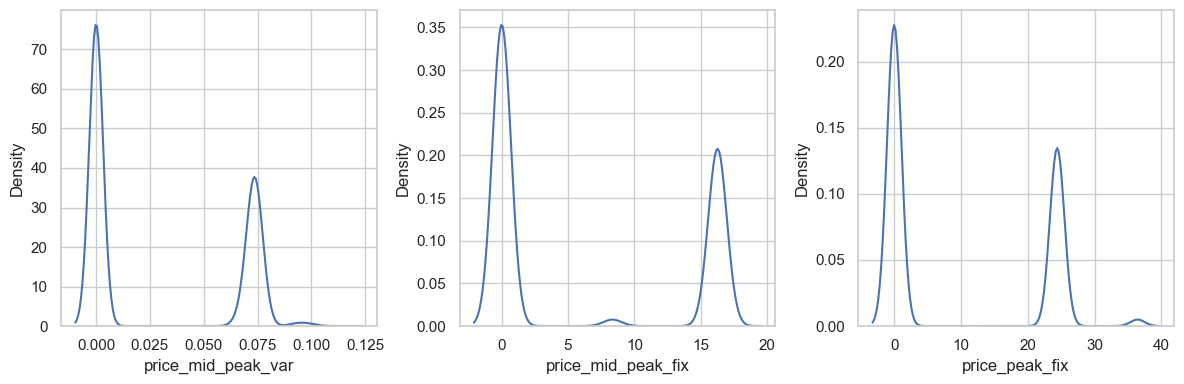

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

sns.kdeplot(merged_df['price_mid_peak_var'], ax=axes[0])
sns.kdeplot(merged_df['price_mid_peak_fix'], ax=axes[1])
sns.kdeplot(merged_df['price_peak_fix'], ax=axes[2])

plt.tight_layout()
sns.set_style('whitegrid')
plt.show()

Here we validate that there is a high positive skewness towards zero. The presence of multiple peaks suggests that the data might be multimodal. This indicates that there could be several distinct groups or clusters within the provided data.

Now let's analyze the variables.

In [19]:
numerical_data = merged_df.select_dtypes(['float64', 'int64'])
numerical_data.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

In order to organize the visualizations i'll try to classify the previous columns as follows. I will include churn data for each group to visualize the churn rate for all groups.

In [20]:
consumption = merged_df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'pow_max', 'imp_cons', 'has_gas', 'churn']]
forecast = merged_df[['forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'churn']]
margin = merged_df[['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'churn']]
clients_details = merged_df[['id', 'channel_sales', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]

In [21]:
# A function that i'm using to plot variables density for each group previously defined
def density_plot(data):
    
    plt.figure(figsize=(15, 10))
    sns.set_style('whitegrid')

    for i, var in enumerate(data.columns[:-1], 1):
        plt.subplot(3, 3, i)
        sns.histplot(data=data, x=var, hue='churn', kde=True, element='step', stat='density', common_norm=False)
        plt.title(f'Distribution of {var} by Churn')
    
    plt.tight_layout()
    plt.show()

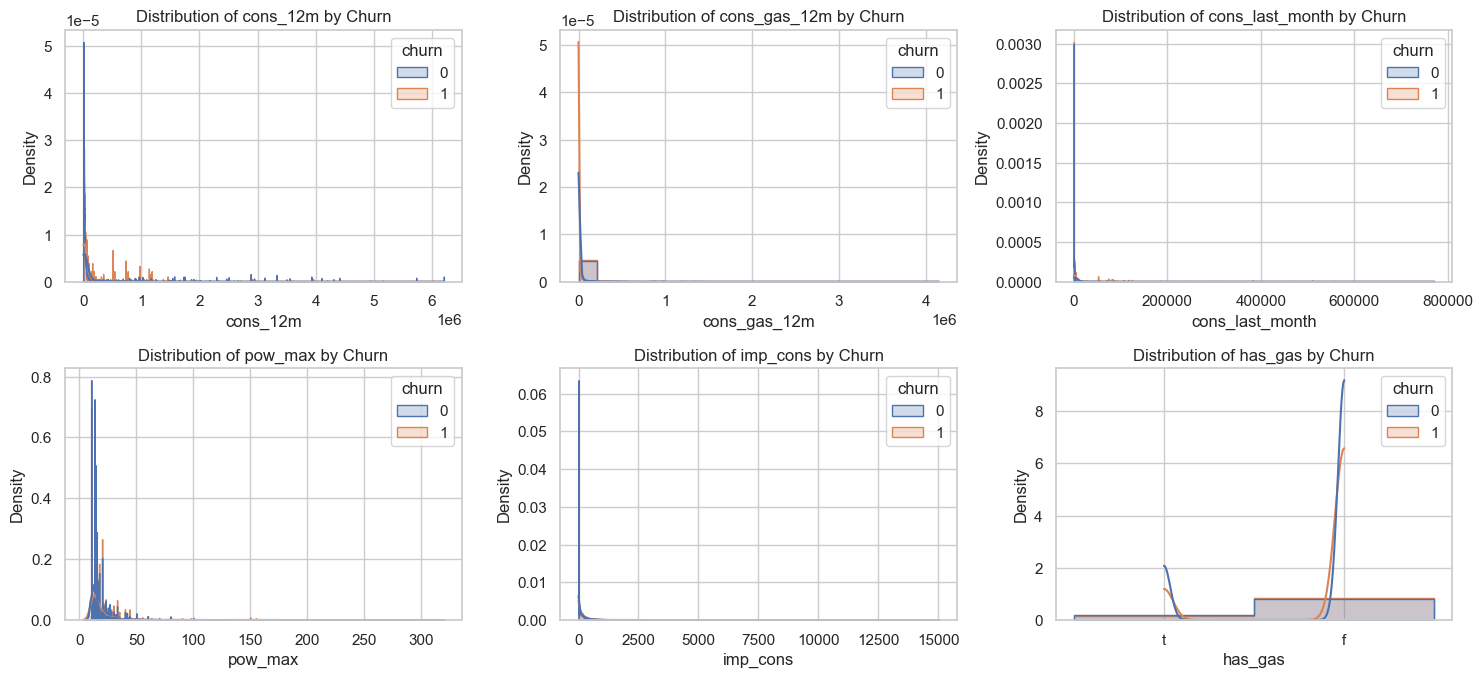

In [22]:
density_plot(consumption)

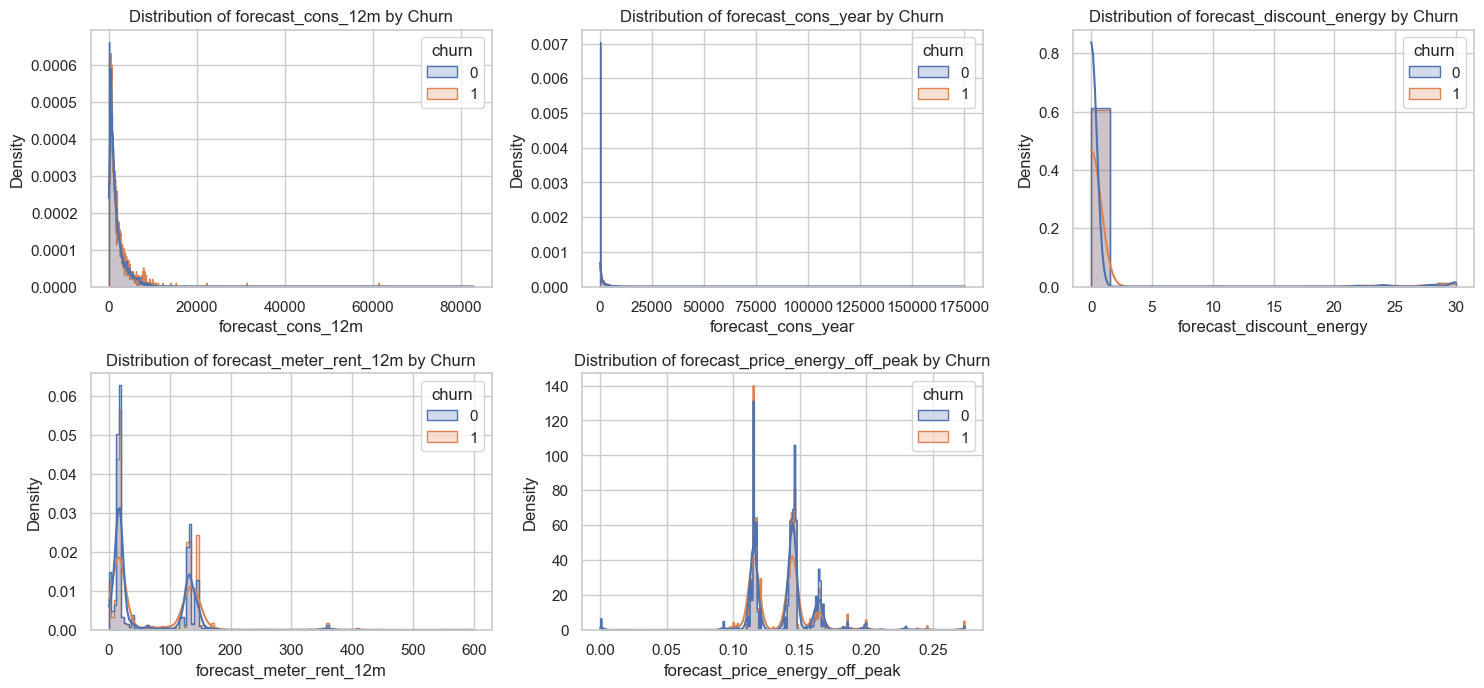

In [23]:
density_plot(forecast)

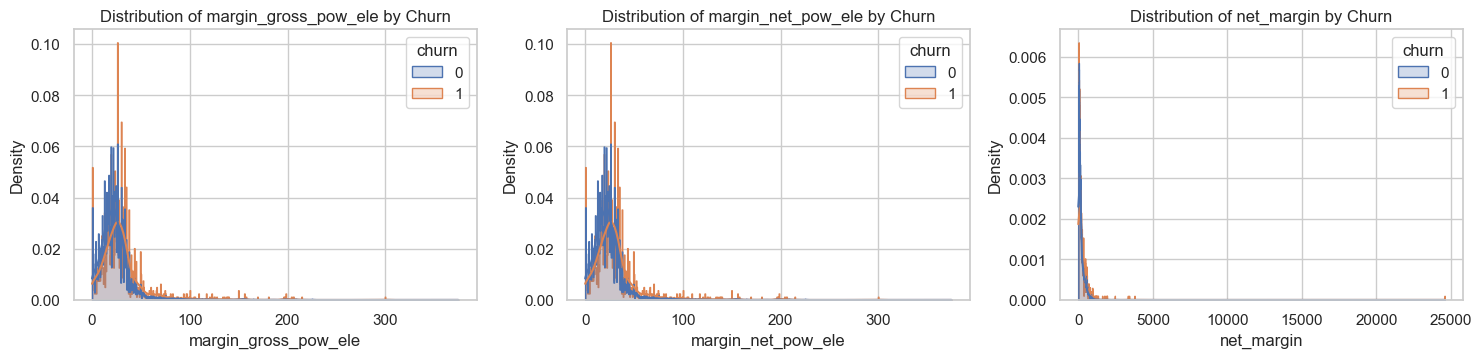

In [24]:
density_plot(margin)

It is important to notice that most of the variables are highly positively skewed. This skewness suggests the presence of outliers and must be corrected before building any machine learning model. I will deal with this in Feature Engineering part.

One of the best ways to visualize outliers is to use boxplots, let's see what they will show us. To do this, i will use boxenplot function instead of boxplot, boxenplot can show us additional quantiles by creating a “pyramid” effect and is useful for visualizing deeper distribution layers in data with long tails (which is the case for many variables).

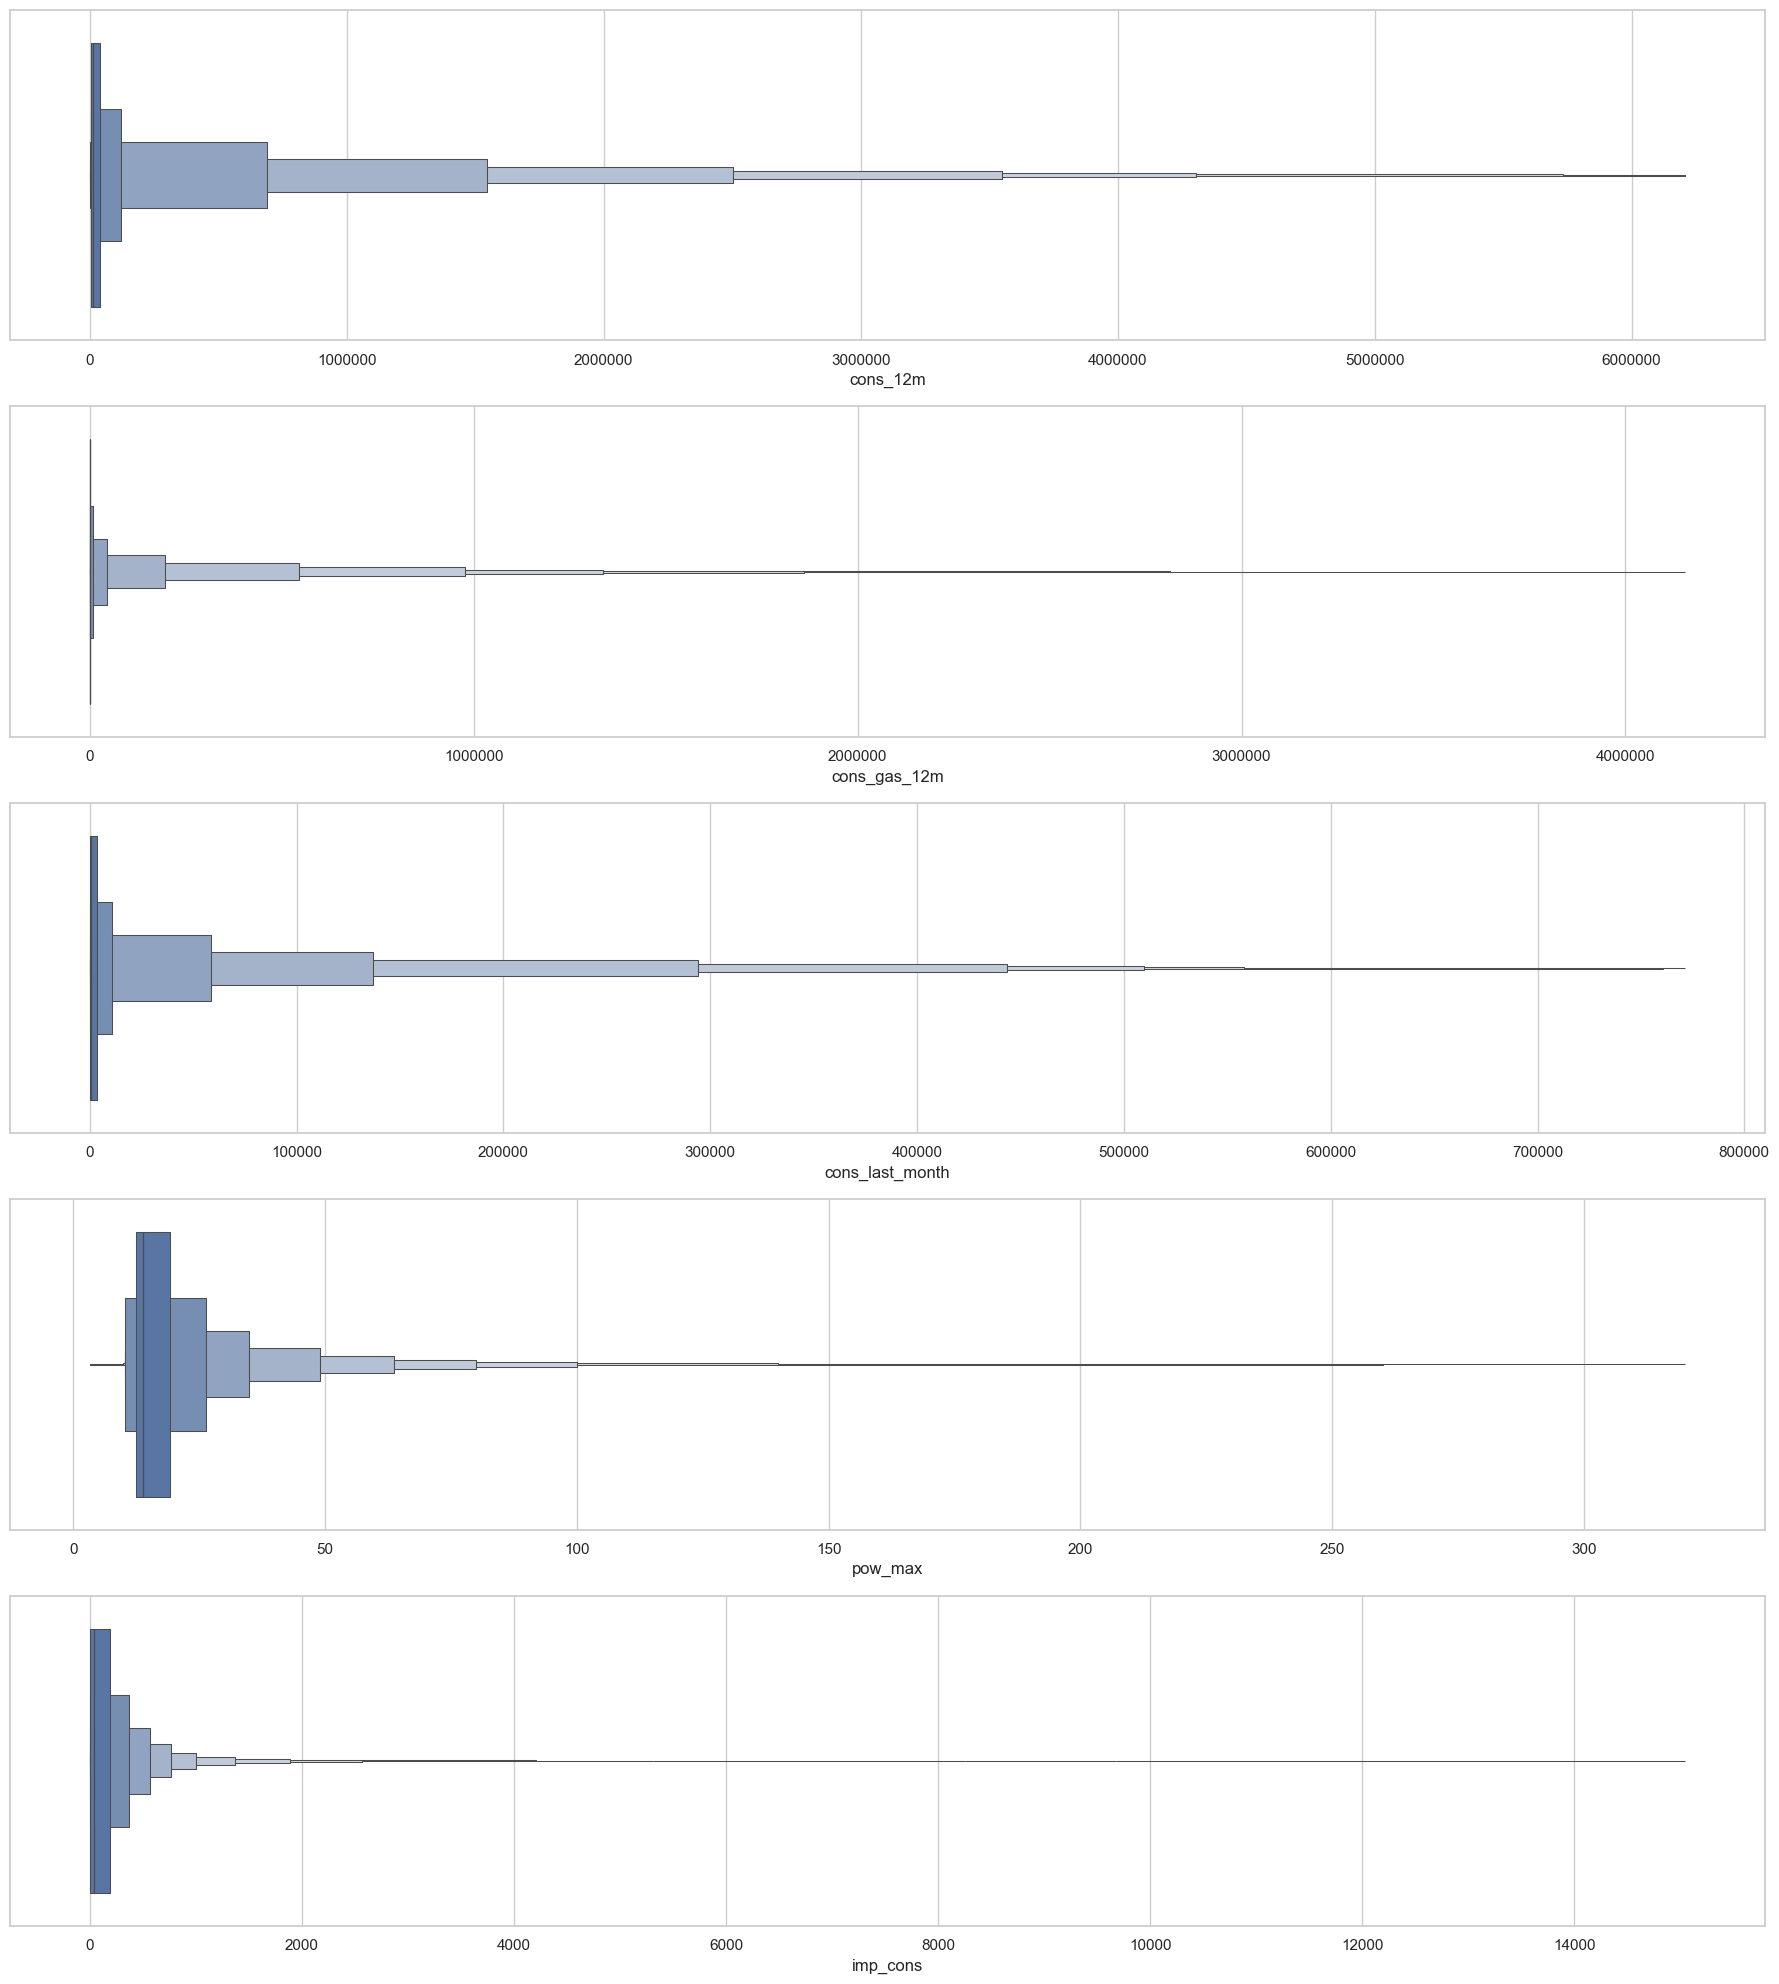

In [25]:
fig, axs = plt.subplots(nrows=len(consumption.columns[:-2]), figsize=(18, 20))

for i, c in enumerate(consumption.columns[:-2]):
    sns.boxenplot(x=consumption[c], ax=axs[i])
    axs[i].set_xlabel(c, fontsize=12)

for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

We can do the same for the other groups (margin and forecasts).

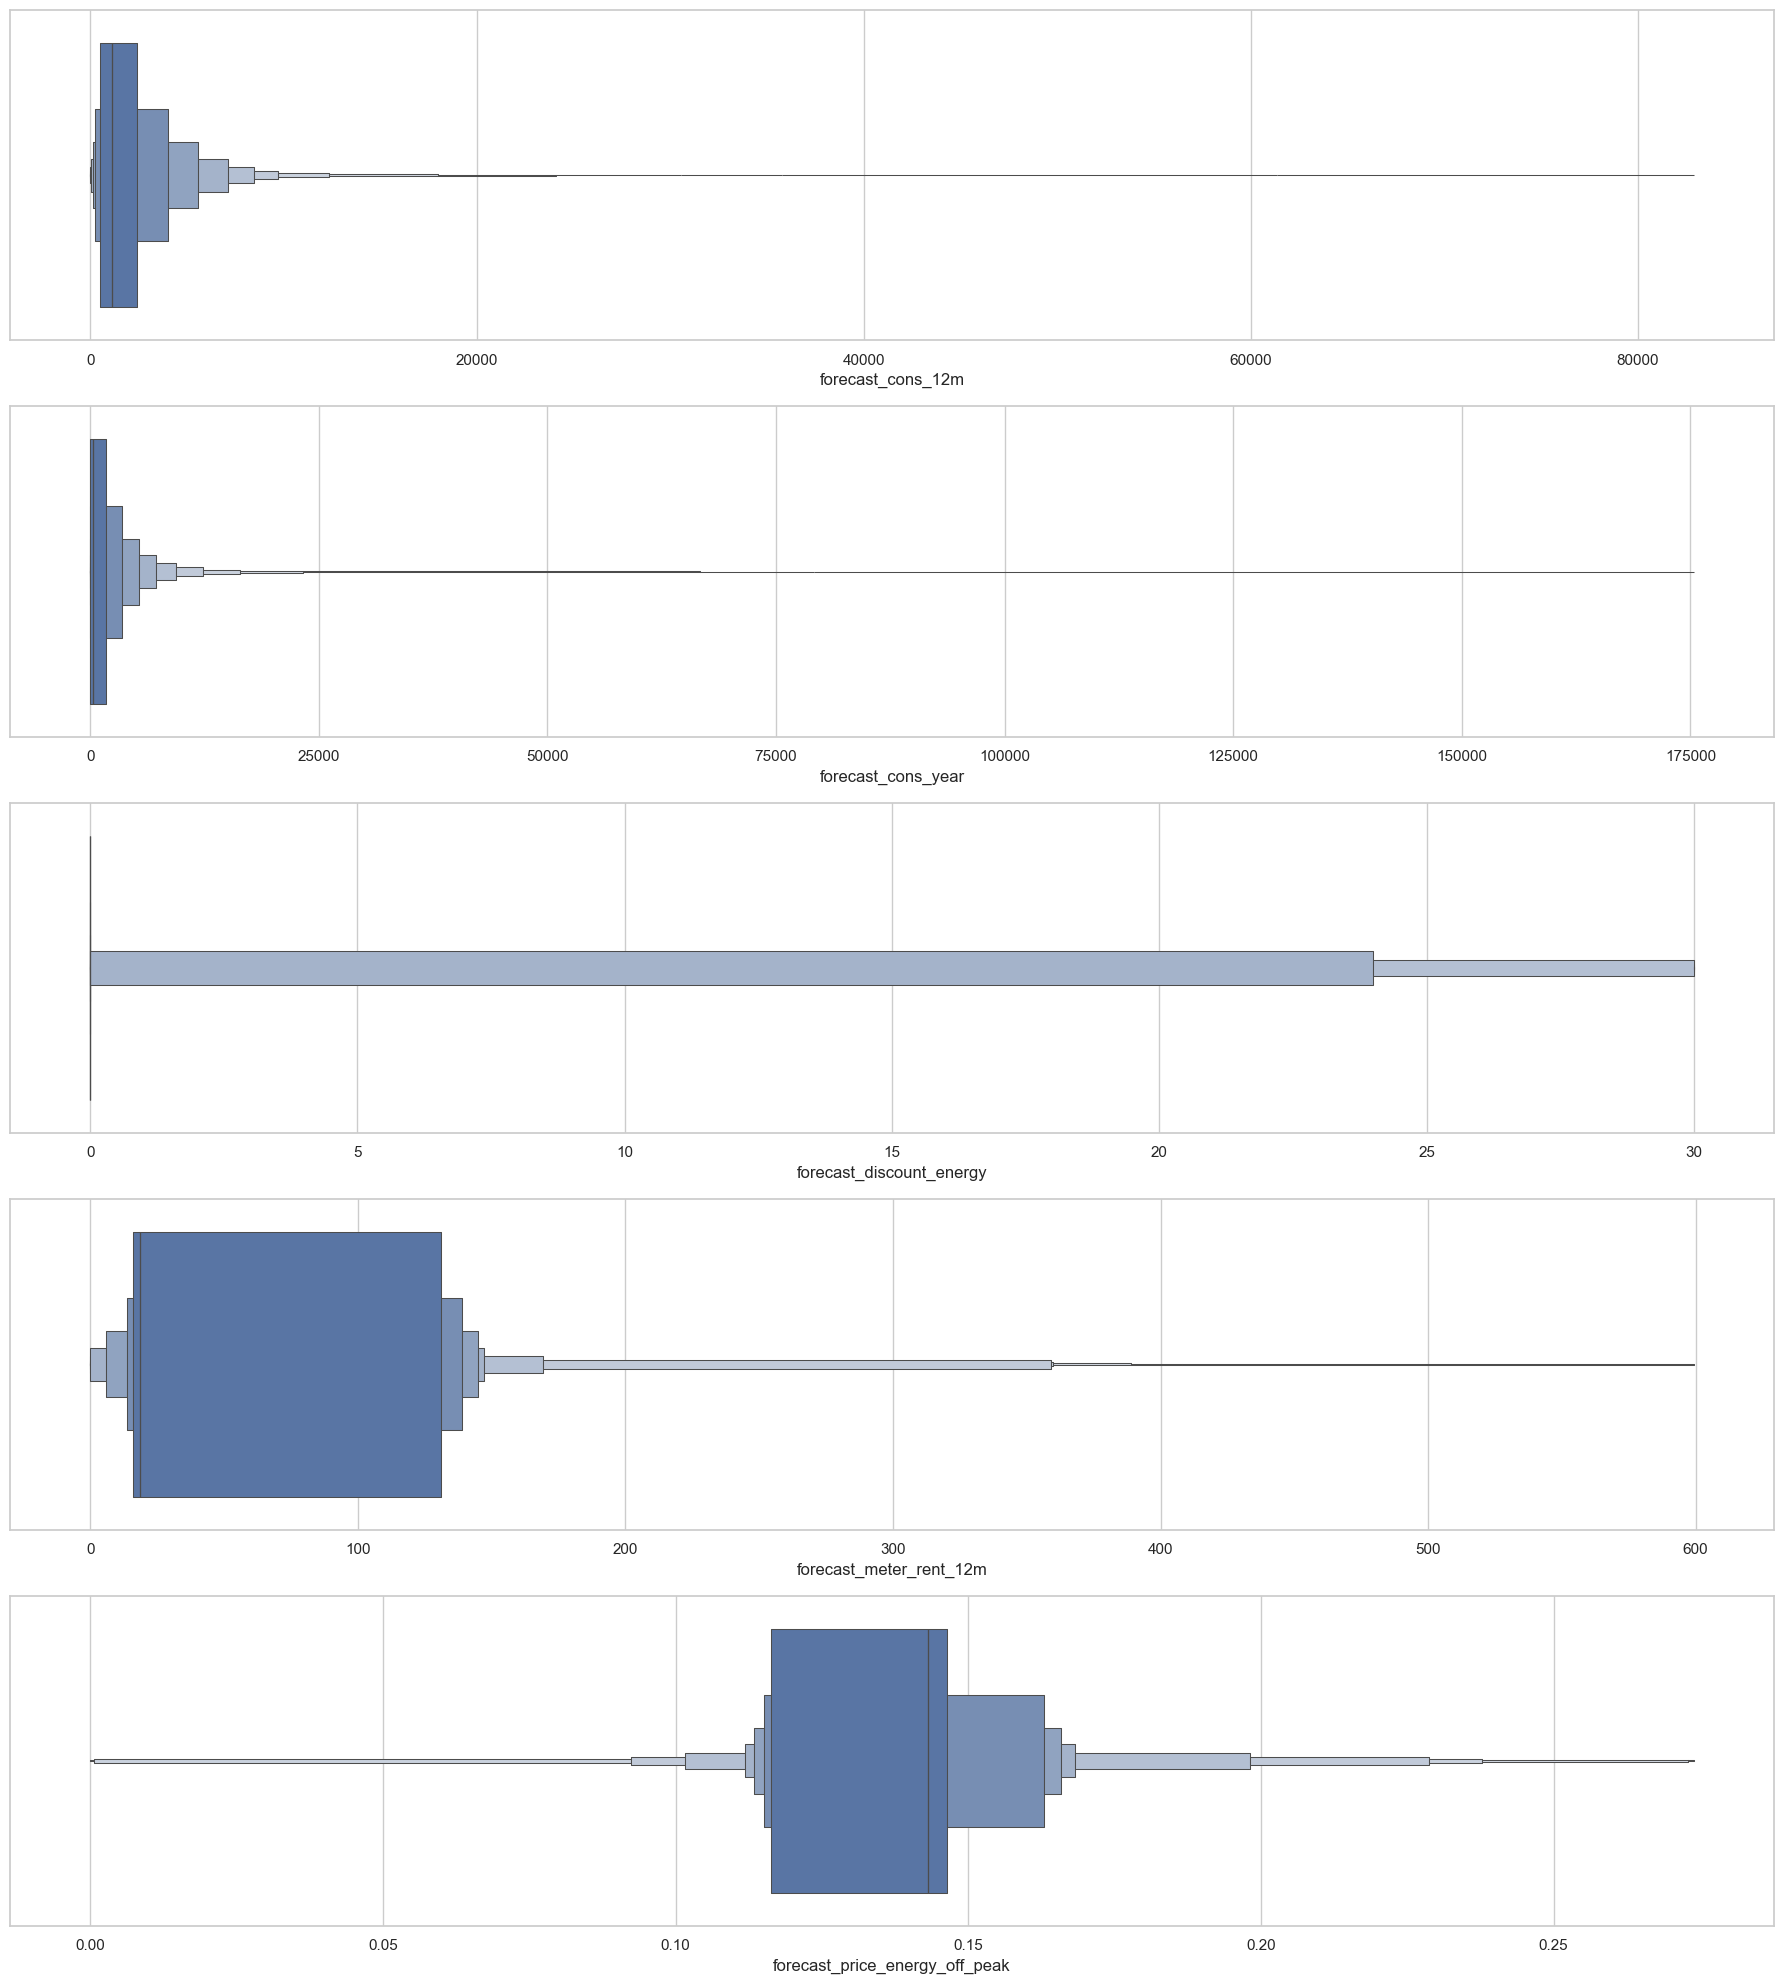

In [26]:
fig, axs = plt.subplots(nrows=len(forecast.columns[:-1]), figsize=(18, 20))

for i, c in enumerate(forecast.columns[:-1]):
    sns.boxenplot(x=forecast[c], ax=axs[i])
    axs[i].set_xlabel(c, fontsize=12)

for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

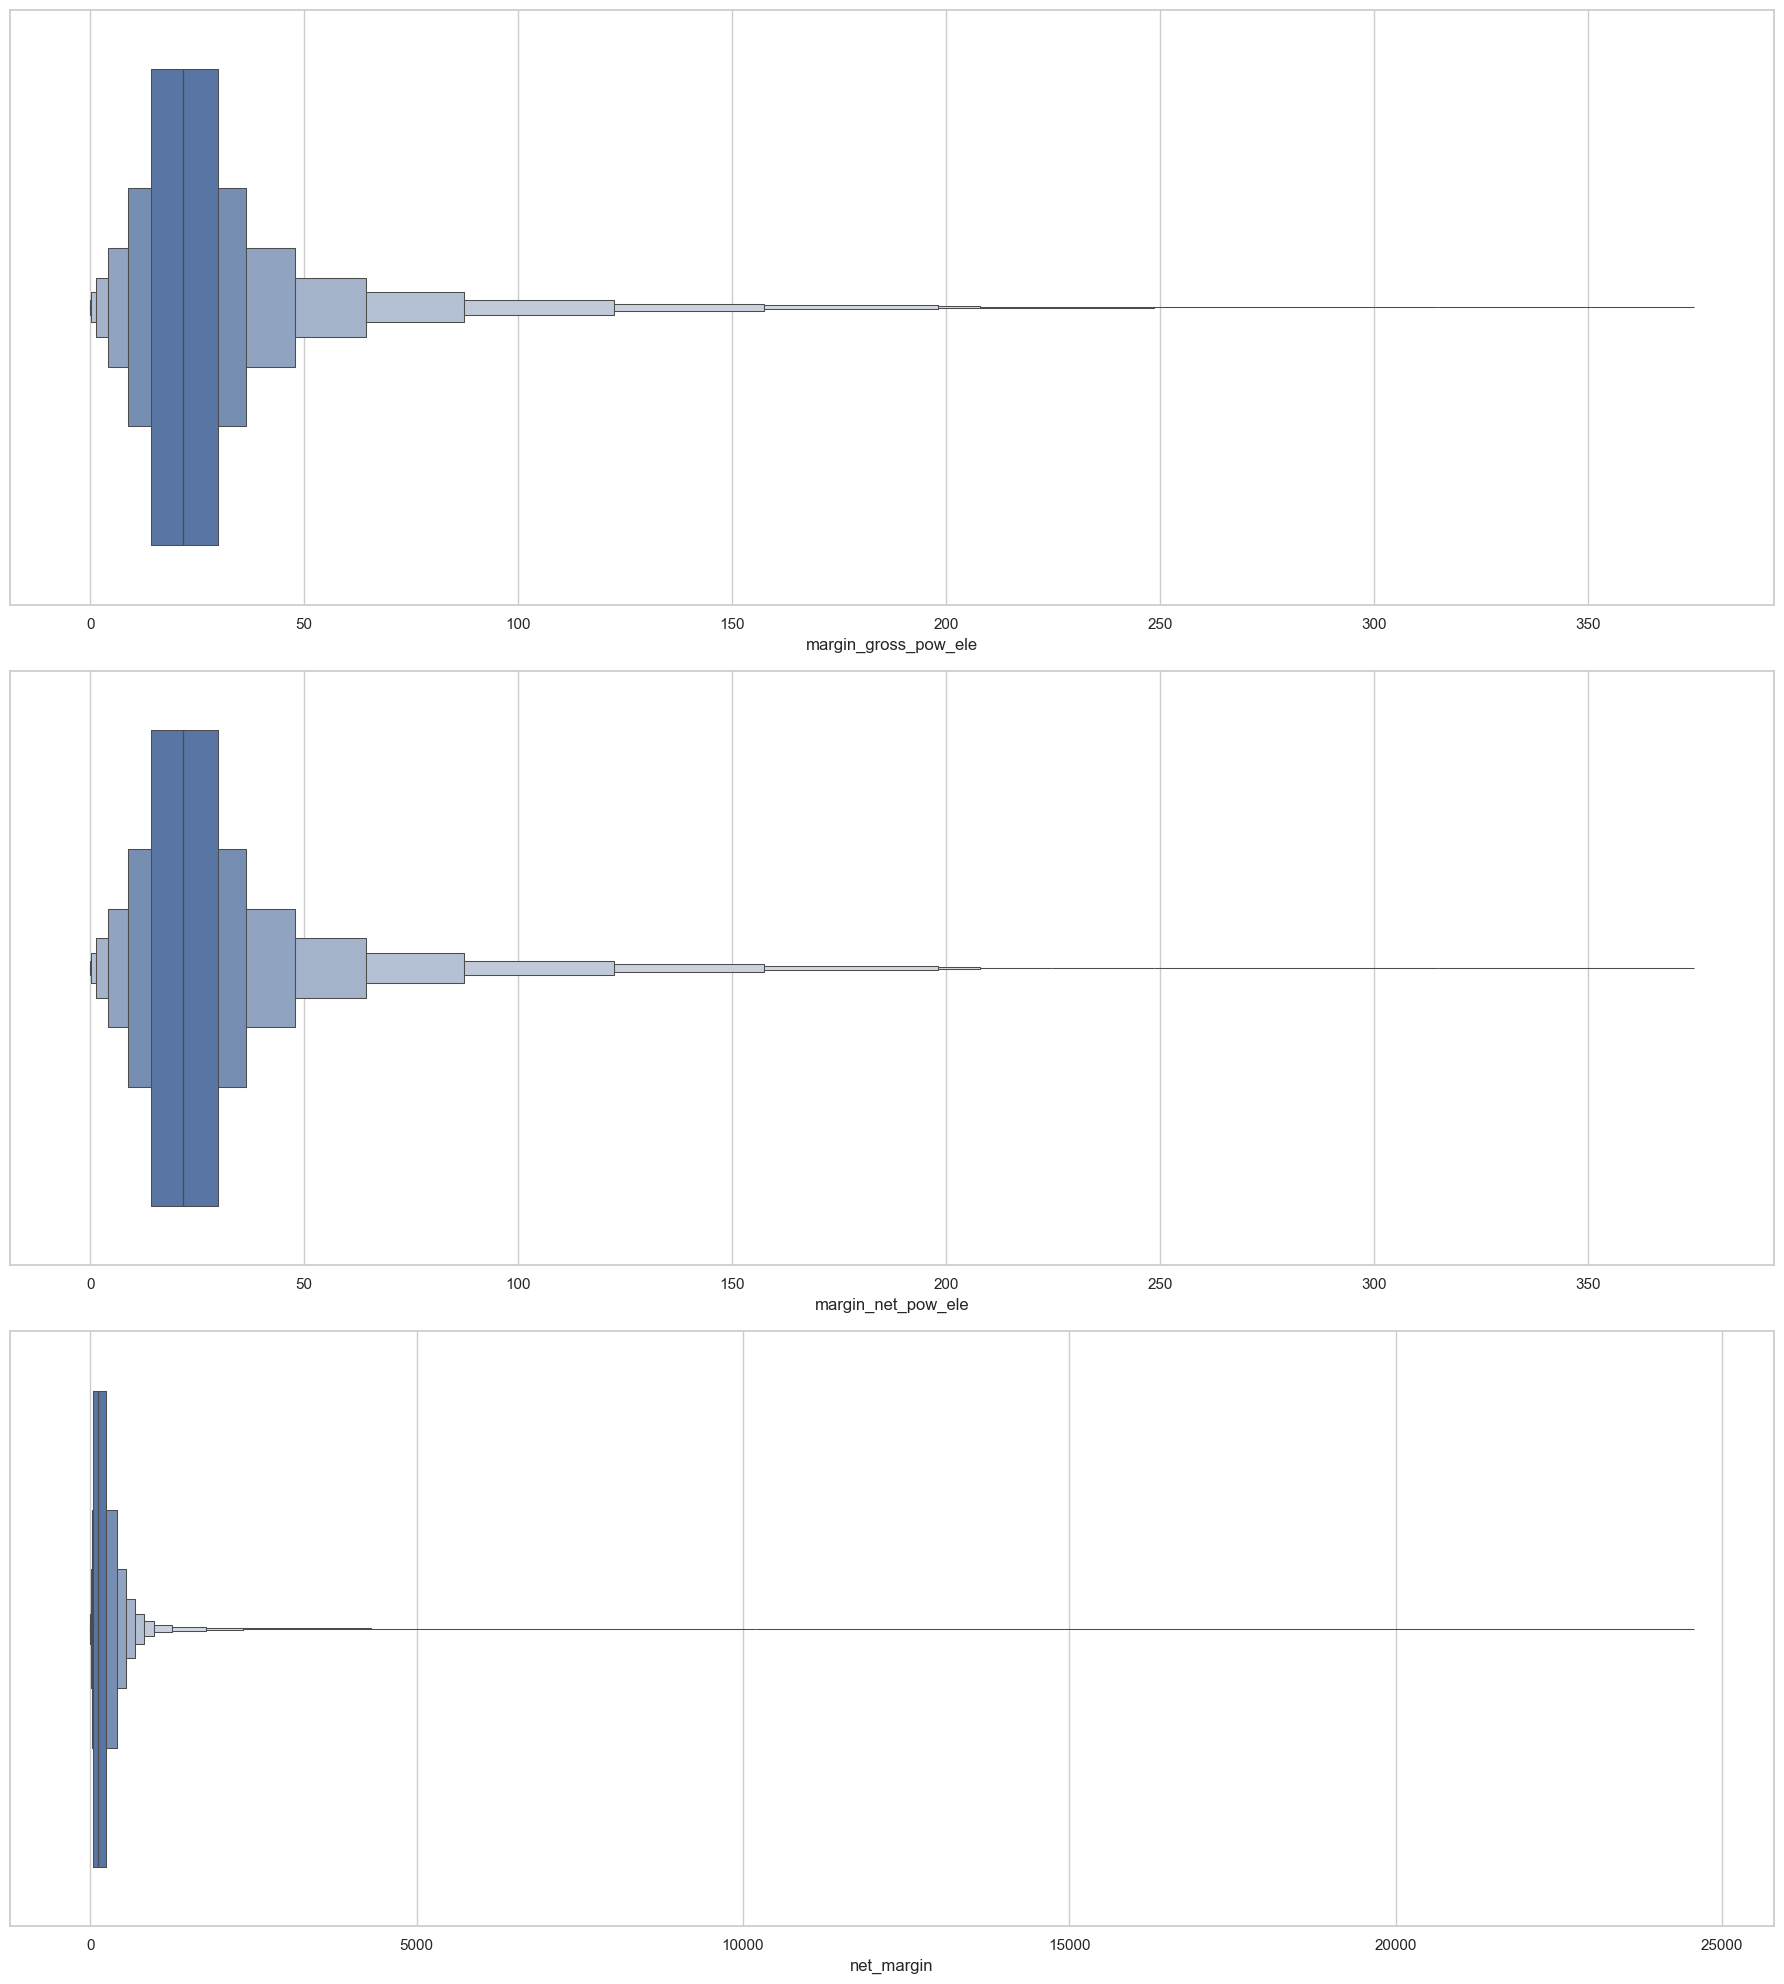

In [27]:
fig, axs = plt.subplots(nrows=len(margin.columns[:-1]), figsize=(18, 20))

for i, c in enumerate(margin.columns[:-1]):
    sns.boxenplot(x=margin[c], ax=axs[i])
    axs[i].set_xlabel(c, fontsize=12)

for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

This way we define quantiles for every group and validate our hypothesis about skewness and outliers.

### Churn rate

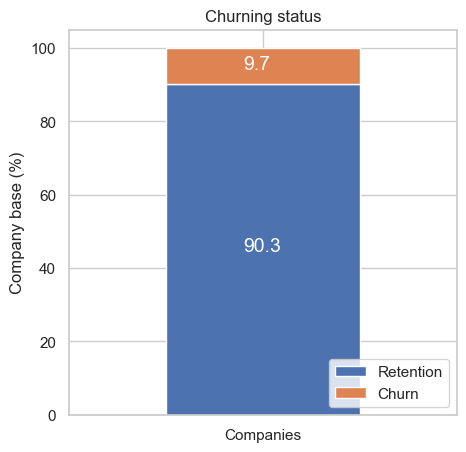

In [28]:
churn = merged_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']

churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

9.7% of the customers churned. This corresponds exactly to the average churn rate seen in descriptive statistics.

## Getting some insights

### Channel sales

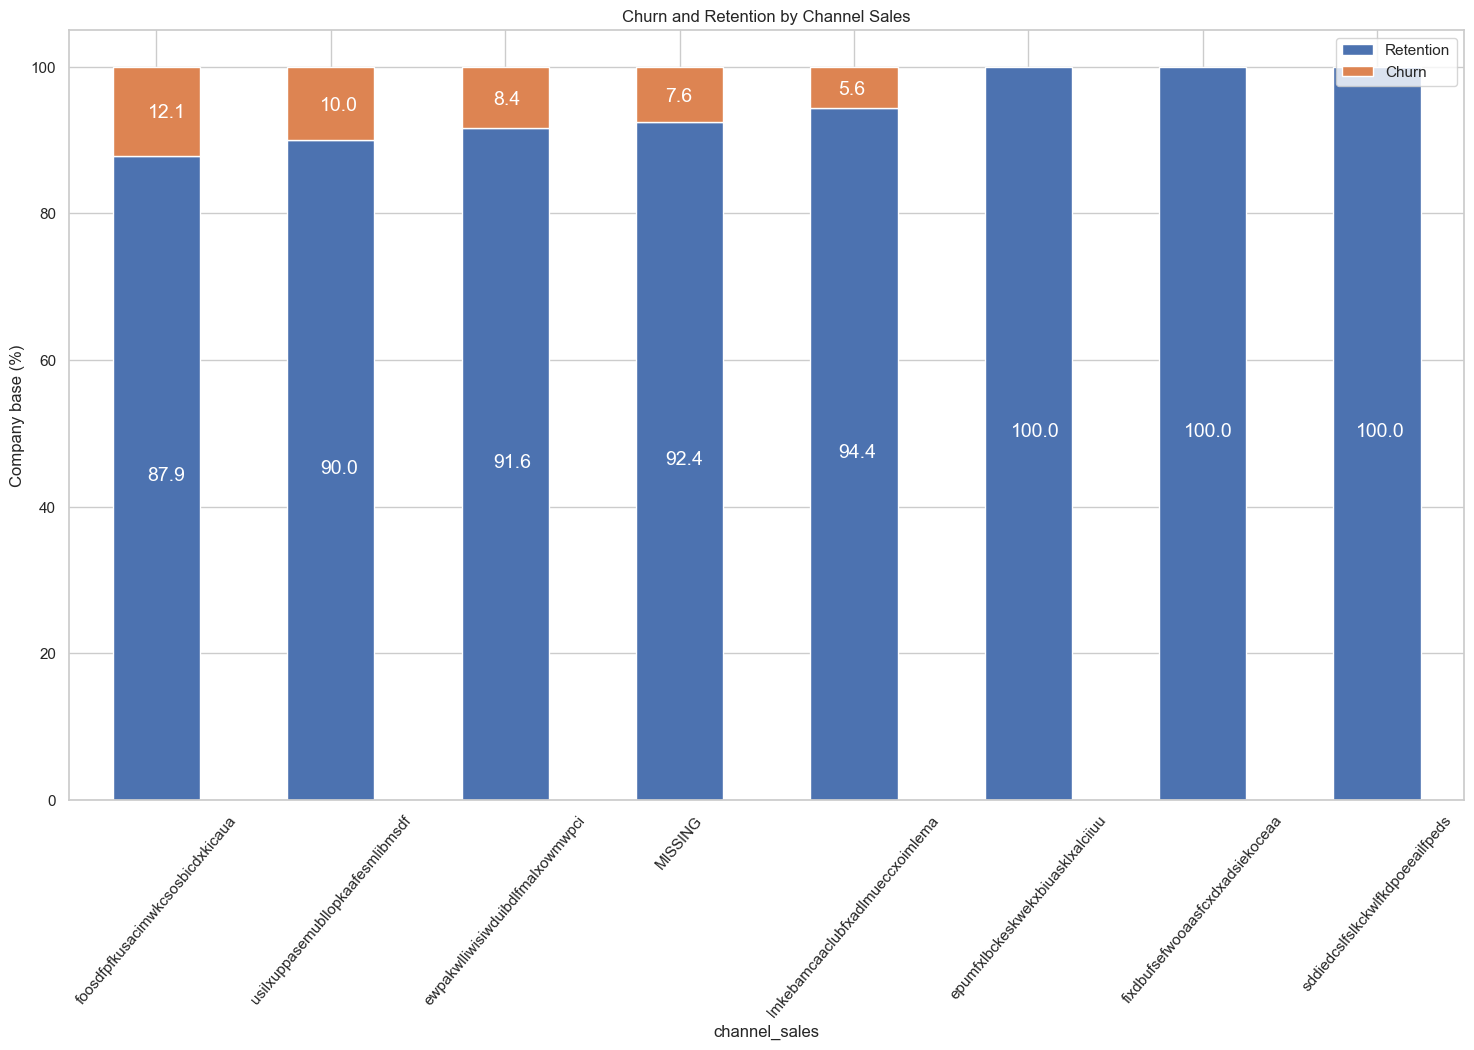

In [29]:
# churn and retention percentages per channel_sales
grouped_channels = merged_df.groupby(['channel_sales', 'churn']).size().unstack(fill_value=0)
grouped_channels = grouped_channels.div(grouped_channels.sum(axis=1), axis=0) * 100

# Sorting by churn percentage
grouped_channels = grouped_channels.sort_values(by=[1], ascending=False)

grouped_channels.columns = ['Retention', 'Churn']

plot_stacked_bars(grouped_channels, "Churn and Retention by Channel Sales", rot_=50)

4 sales channels, among 7 known channels, present churn with different chrun rates. Then we find 'MISSING' channel values in the channel_sales data.
Note that missing values might be already known channel sales or a new sales channel that isn't indicated in the dataset.

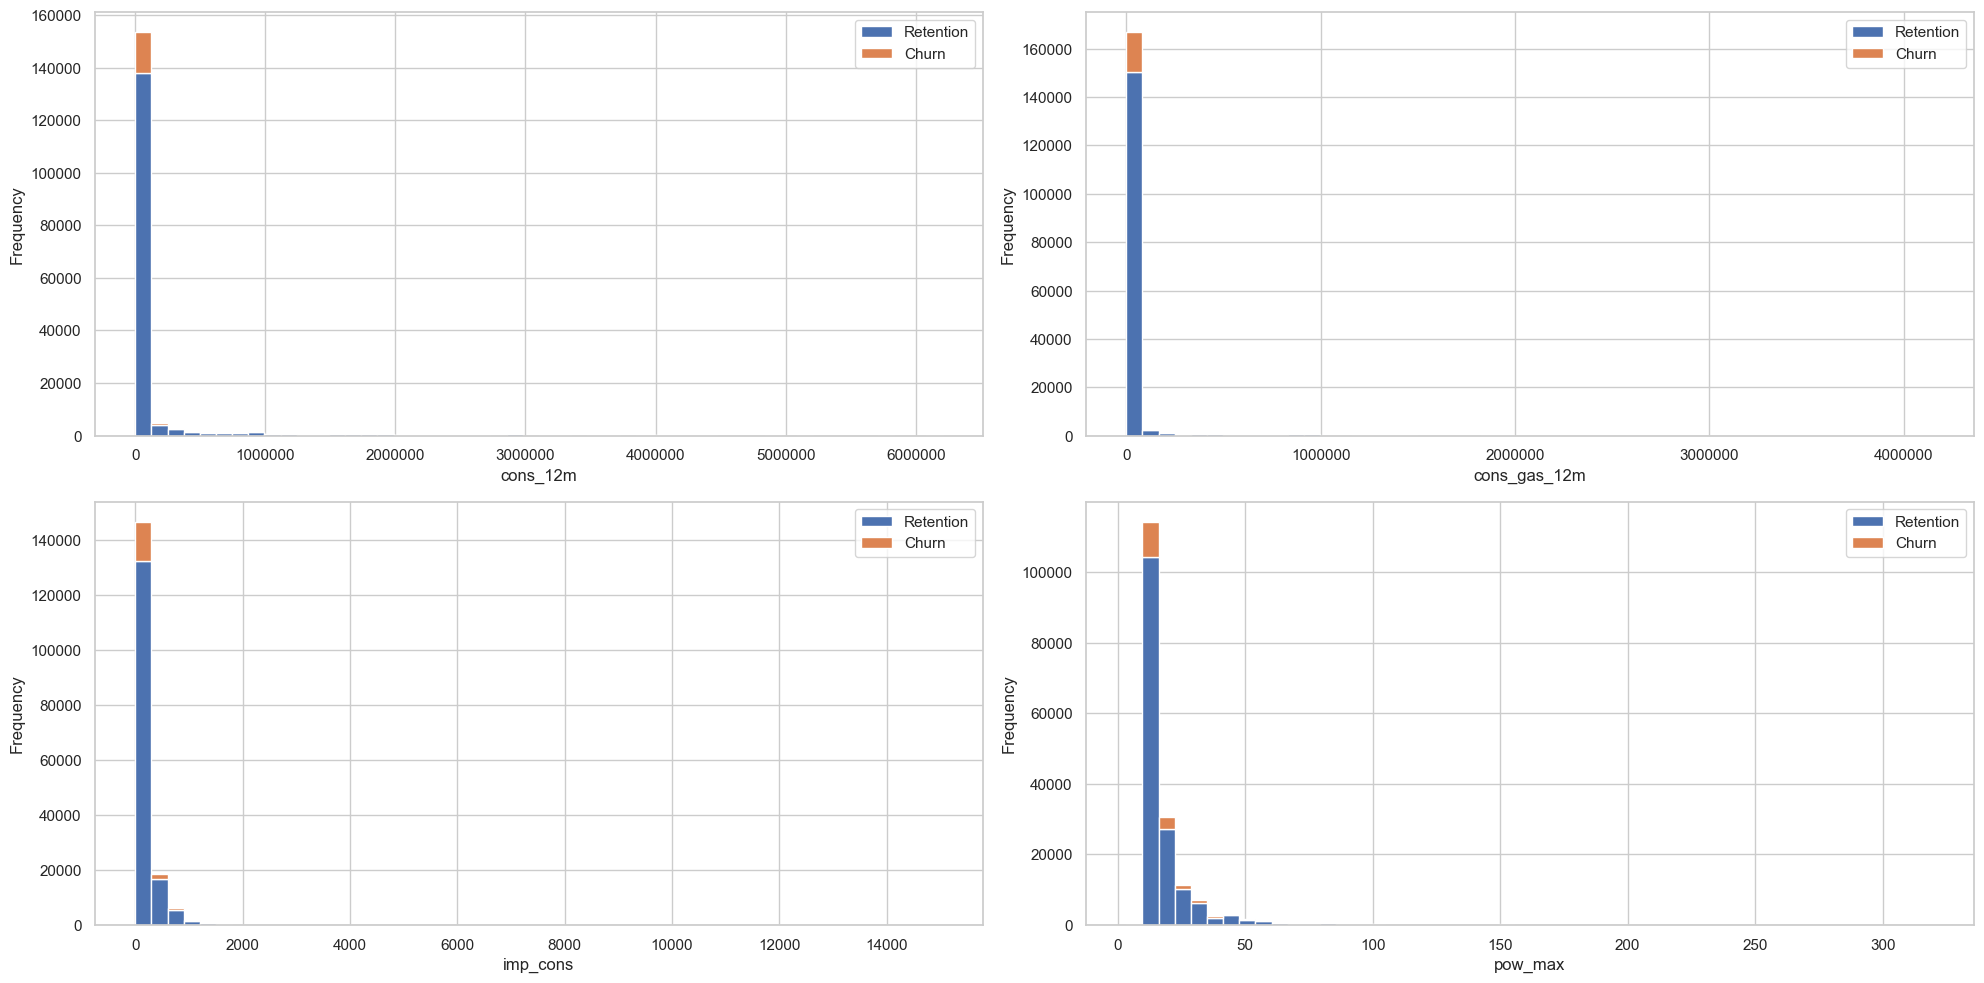

In [30]:
fig, axes = plt.subplots(2,2, figsize=(20, 10))

plot_distribution(consumption, 'cons_12m', ax=axes[0][0])
plot_distribution(consumption, 'cons_gas_12m', ax=axes[0][1])
plot_distribution(consumption, 'imp_cons', ax=axes[1][0])
plot_distribution(consumption, 'pow_max', ax=axes[1][1])

plt.tight_layout()
plt.show()

Overall, the consumption distributions are highly skewed to the right. This suggests the presence of outliers that could affect our analysis. To display outliers we can use boxplots, and to deal with them we can use zscore or IQR methods. Churn is relatively low overall but we need to understand why customers leave.

### Correlation between variables

In [31]:
numerical_data.head(3)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,...,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,...,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,...,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


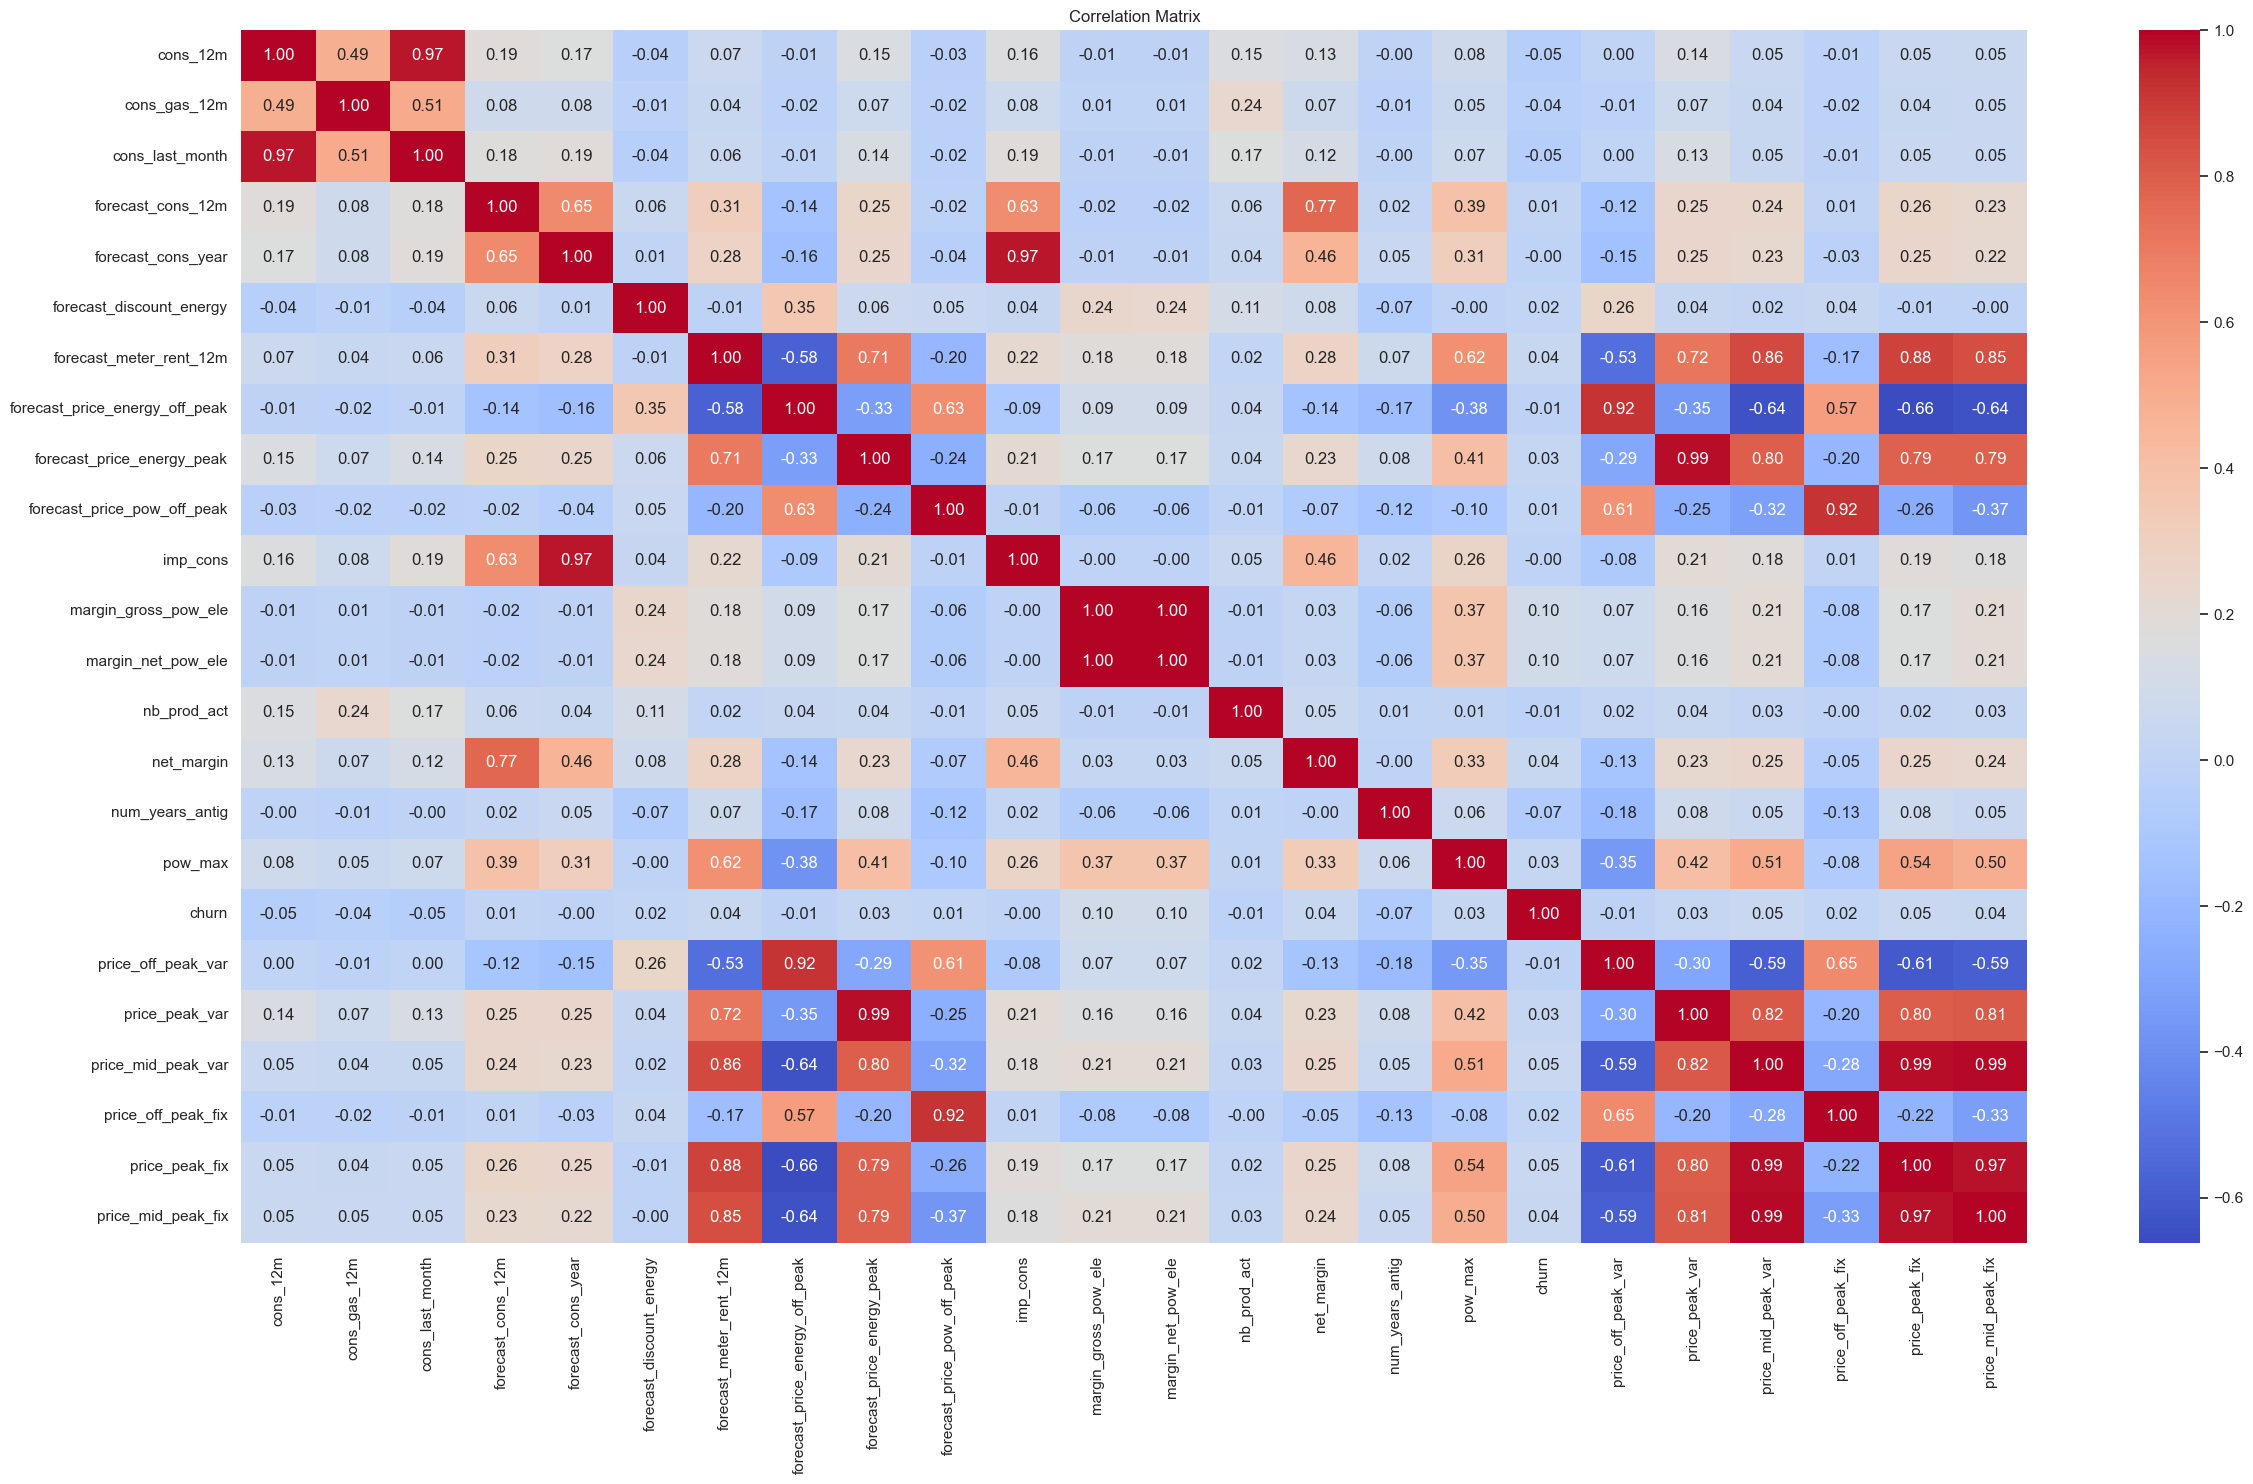

In [32]:
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

- power_max is correlated to price for the 2nd and 3rd periods (for both fix and variable prices).
- There is a non-negligeable consumption between consumption and the number of active products, which is normal since the more the products the more the concumption.
- There is a high positive correlation between forecasted consumtion (over 12 months and over the year) and paid consumption (imp_cons) and the net margin.
- There is a strong positive correlation between the forecasted bill for meter rental over the next 12 months and both price_peak and price_mid_peak, applicable to both variable and fixed prices. Conversely, a negative correlation is observed between the 12-month rental forecast and the price for the first period, suggesting that we anticipate higher rental bills as the price changes over periods.
- The forecasted energy price and power_max price for the 1st period is highly correlated to price off peak which is normal. Note that forecasted energy price is more correlated to variable price and forecasted power_max price is more correlated to fix price.
- The forecasted energy price is highly correlated not only to price_peak but also to price for mid peak (3rd period).

In [33]:
price_data = ['price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']

In [34]:
years = [merged_df['date_activ'].dt.year, merged_df['date_end'].dt.year, merged_df['date_modif_prod'].dt.year, 
         merged_df['date_renewal'].dt.year]

#### First plots to understand price variability

In [35]:
def real_forecast_comp_plot(dataframe, years, real, forecast):

    fig, axs = plt.subplots(len(years), 1, figsize=(15,15))

    for i, year in enumerate(years):
        sns.lineplot(data=dataframe,x=year, y=dataframe[real], ax=axs[i], label=str(real))
        sns.lineplot(x=year, y=dataframe[forecast], ax=axs[i], label=str(forecast))

    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

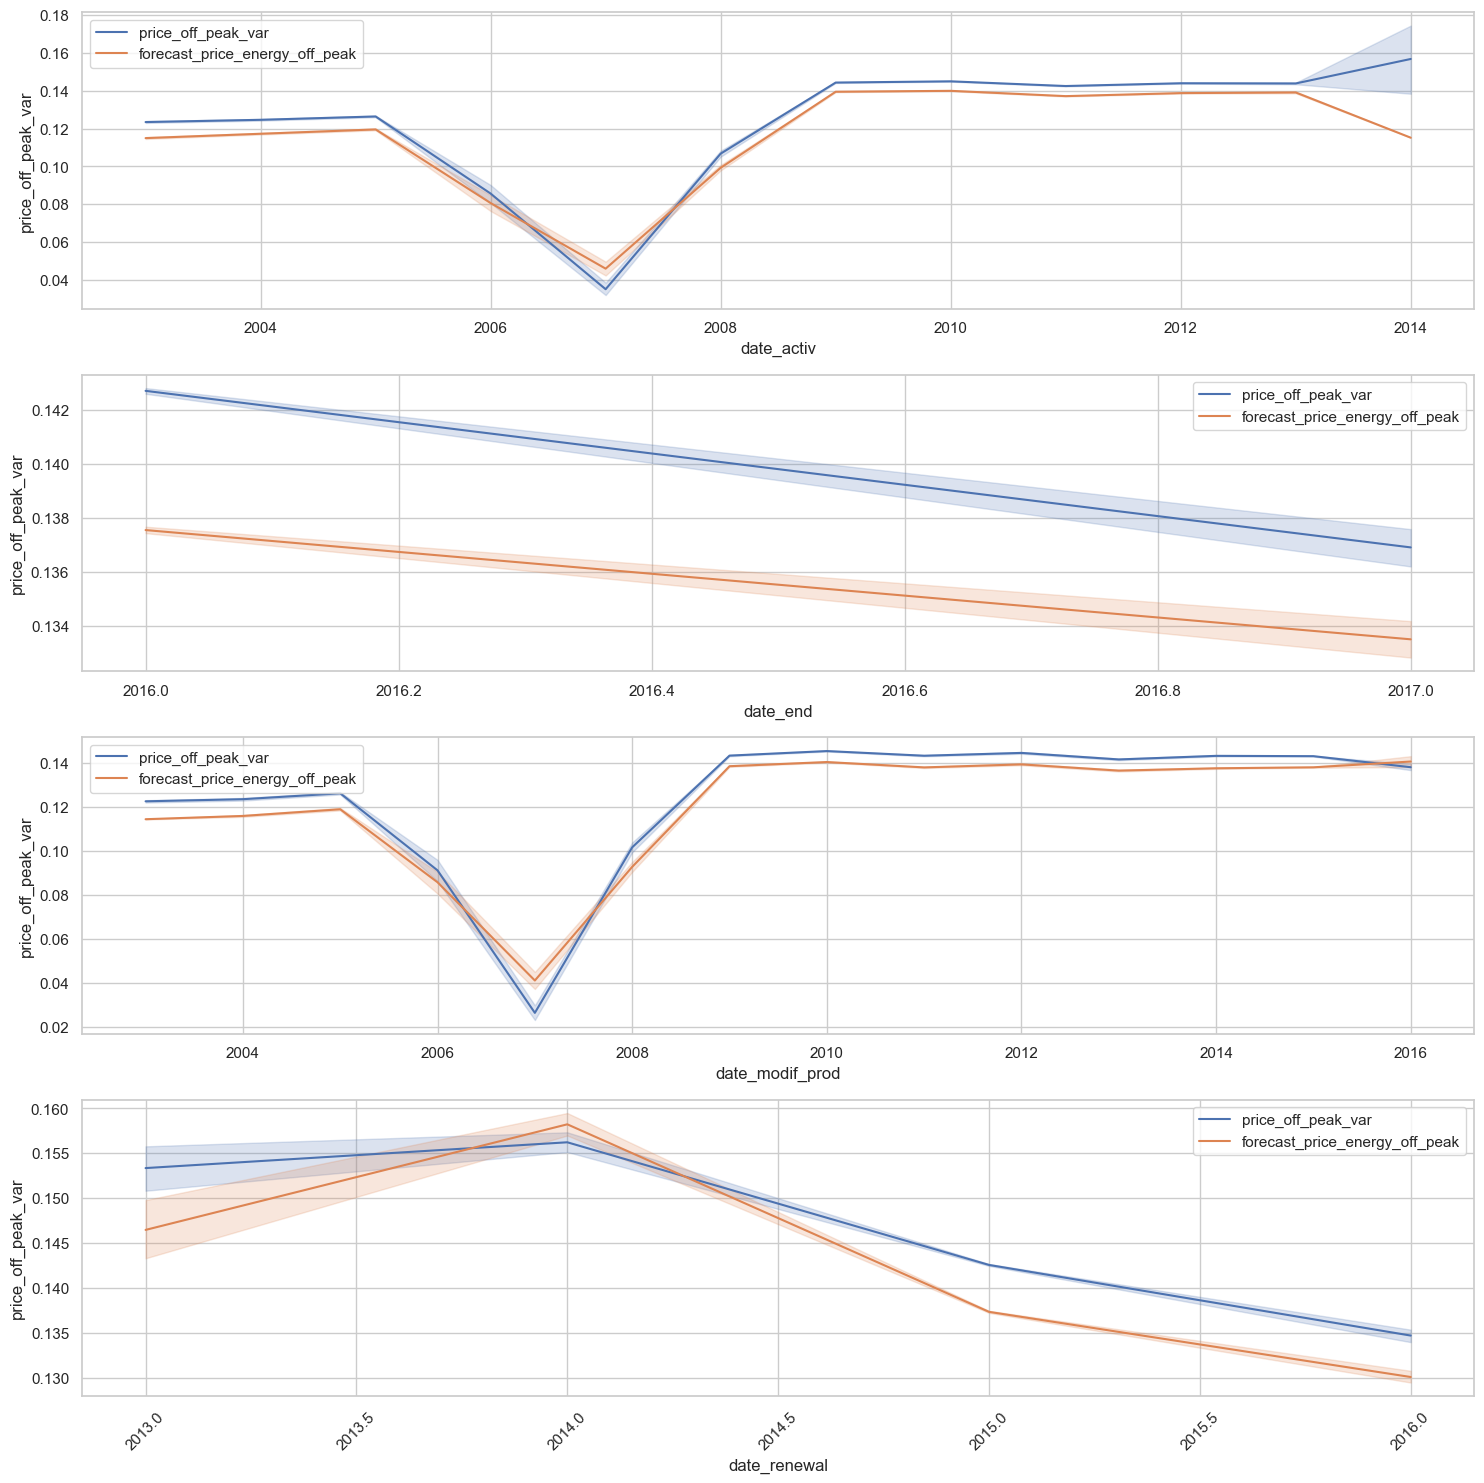

In [36]:
real_forecast_comp_plot(dataframe=merged_df, years=years, real='price_off_peak_var', forecast='forecast_price_energy_off_peak')

### Evolution of price at activation, renewal and end dates.

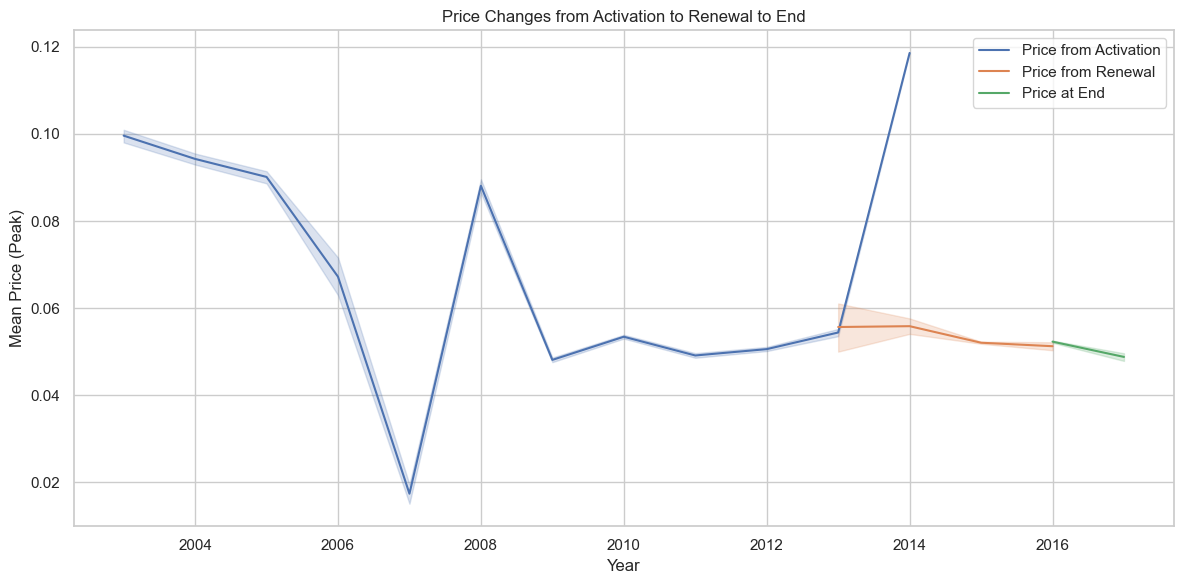

In [48]:
merged_df['year_activ'] = merged_df['date_activ'].dt.year
merged_df['year_renewal'] = merged_df['date_renewal'].dt.year
merged_df['year_end'] = merged_df['date_end'].dt.year

# For simplicity, let's aggregate mean price_off_peak_var over the years from date_activ to date_end
merged_df['mean_price_peak_var'] = merged_df.groupby('id')['price_peak_var'].transform('mean')

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='year_activ', y='mean_price_peak_var', label='Price from Activation')
sns.lineplot(data=merged_df, x='year_renewal', y='mean_price_peak_var', label='Price from Renewal')
sns.lineplot(data=merged_df, x='year_end', y='mean_price_peak_var', label='Price at End')

plt.title('Price Changes from Activation to Renewal to End')
plt.xlabel('Year')
plt.ylabel('Mean Price (Peak)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Comparing variable price to forecasted price during off-peak and peak periods

#### For Energy

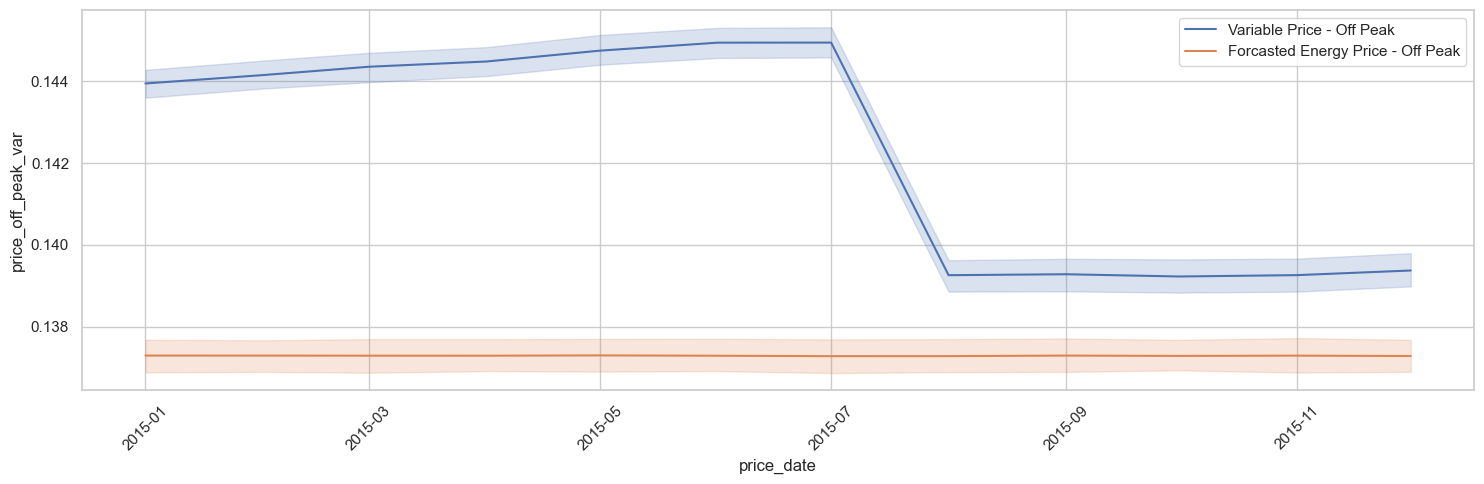

In [40]:
plt.figure(figsize=(15,5))
sns.lineplot(data=merged_df, x='price_date', y='price_off_peak_var', label='Variable Price - Off Peak')
sns.lineplot(data=merged_df, x='price_date', y='forecast_price_energy_off_peak', label='Forcasted Energy Price - Off Peak')

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

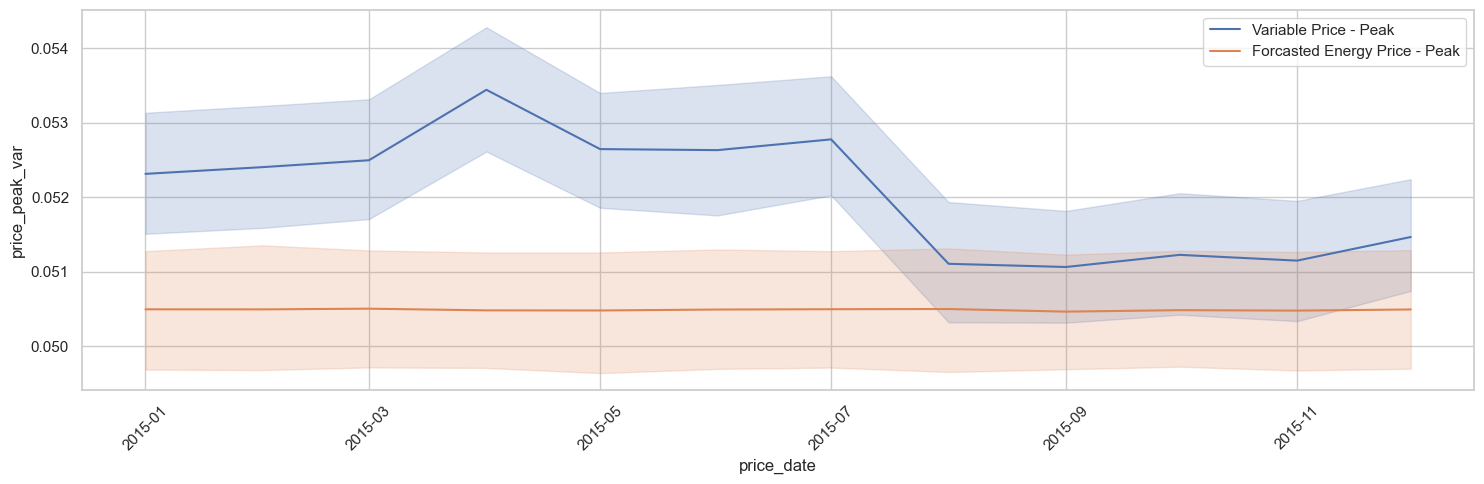

In [41]:
plt.figure(figsize=(15,5))
sns.lineplot(data=merged_df, x='price_date', y='price_peak_var', label='Variable Price - Peak')
sns.lineplot(data=merged_df, x='price_date', y='forecast_price_energy_peak', label='Forcasted Energy Price - Peak')

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

During both off peak periods and peak periods energy price is greater than the forecasted price.

Insights :
1.	Forecast Inaccuracy: The forecasting model may need adjustments to predict suitable prices for customers.
2.	Customer Impact: Higher prices than expected might affect customer satisfaction and could increase churn.
3.	Price Sensitivity: We need to analyze patterns such as consumption to understand price sensitivity.

#### For Power

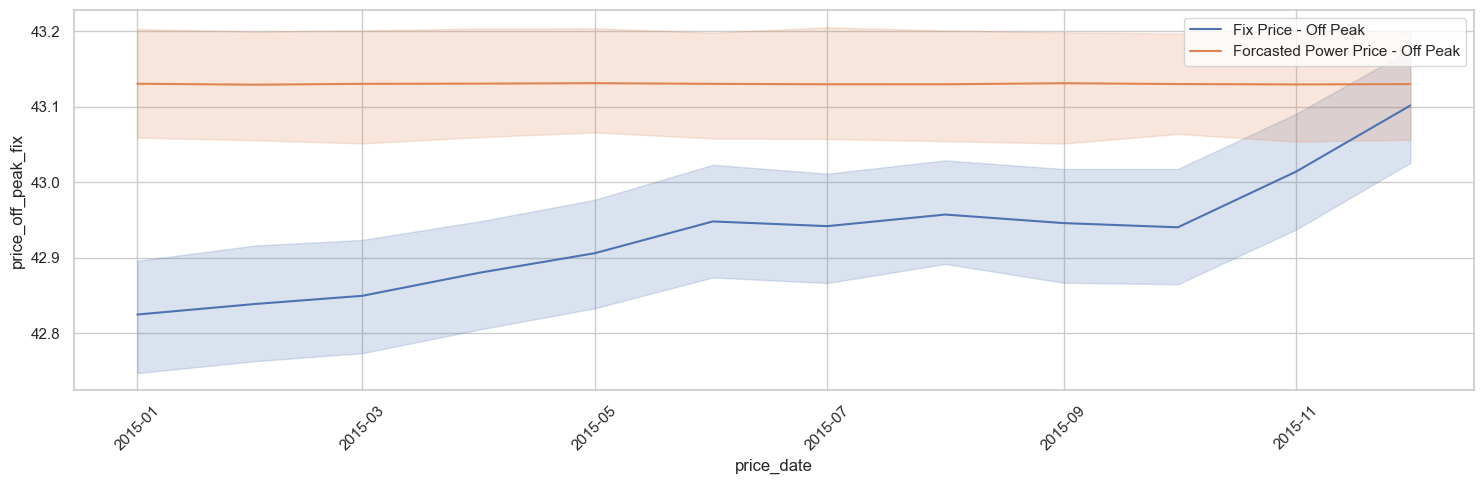

In [30]:
plt.figure(figsize=(15,5))
sns.lineplot(data=merged_df, x='price_date', y='price_off_peak_fix', label='Fix Price - Off Peak')
sns.lineplot(data=merged_df, x='price_date', y='forecast_price_pow_off_peak', label='Forcasted Power Price - Off Peak')

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

On the other hand, power price is underestimated.

### Consumption variability in 2015

<Axes: xlabel='price_date', ylabel='cons_12m'>

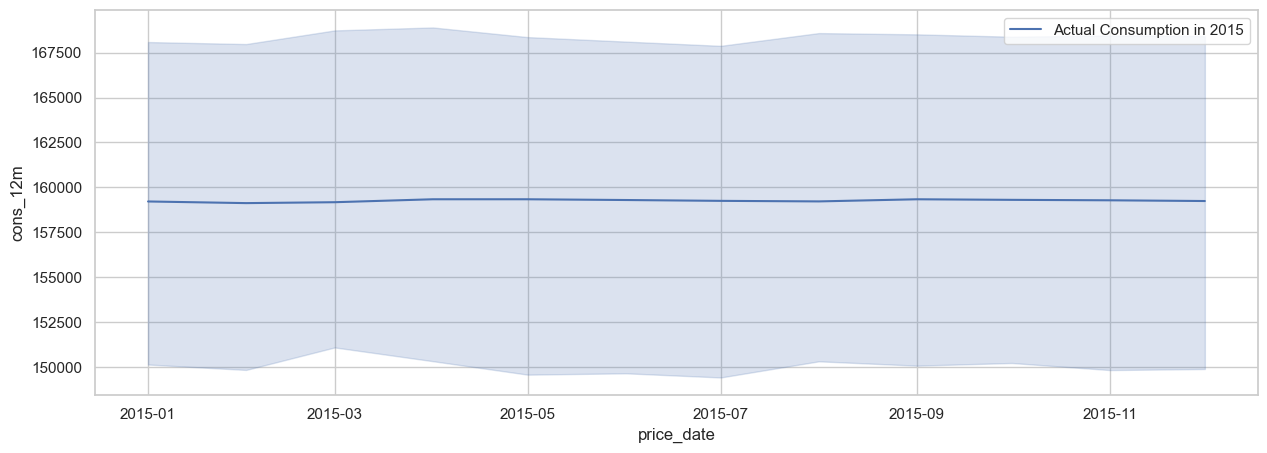

In [42]:
plt.figure(figsize=(15,5))
sns.lineplot(data=merged_df, x='price_date', y='cons_12m', label='Actual Consumption in 2015')

<Axes: xlabel='price_date', ylabel='forecast_meter_rent_12m'>

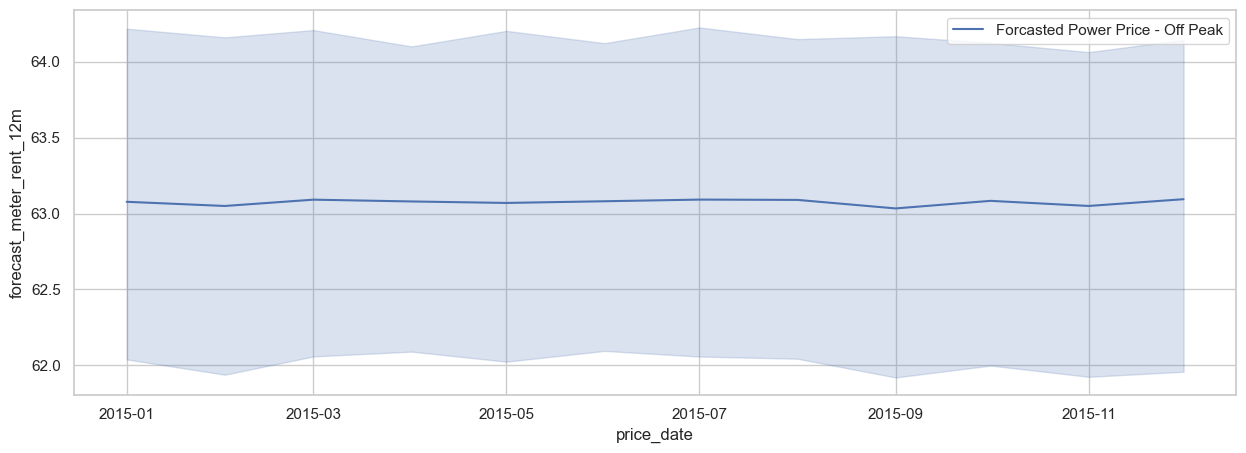

In [43]:
plt.figure(figsize=(15,5))
sns.lineplot(data=merged_df, x='price_date', y='forecast_meter_rent_12m', label='Forcasted Power Price - Off Peak')

`It seems like the consumption isn't impacted by the variability of energy price`.

Now let's look up the variation of price and forecasted price over the years and also the variation of consumption over the years in order to see the impact of price sensitivity.

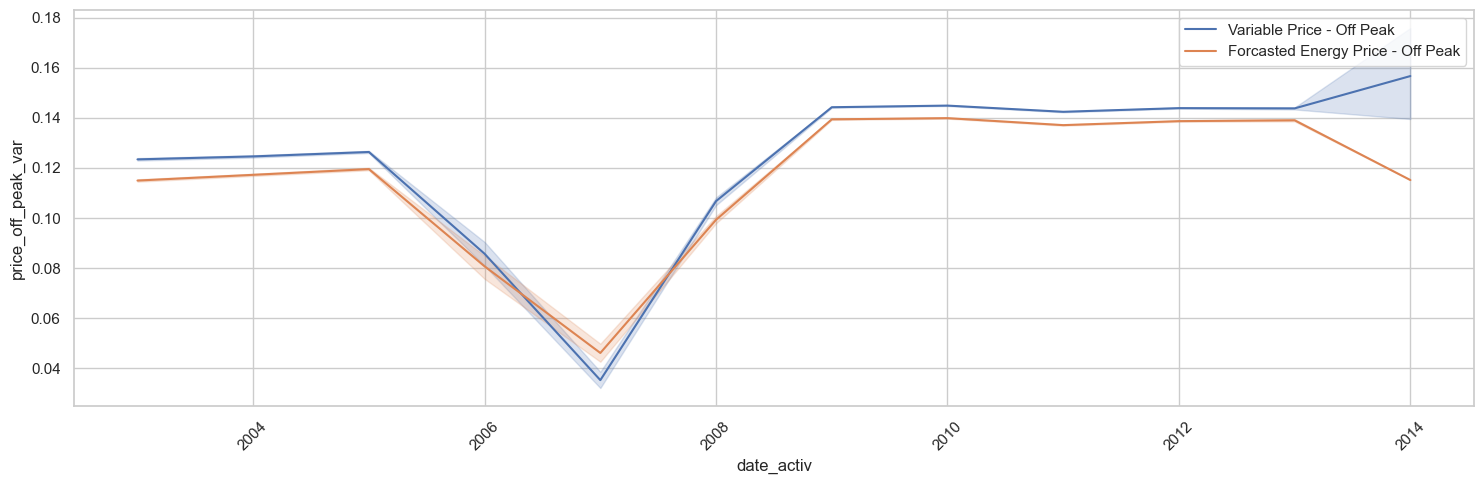

In [44]:
plt.figure(figsize=(15,5))
sns.lineplot(data=merged_df, x=merged_df['date_activ'].dt.year, y='price_off_peak_var', label='Variable Price - Off Peak')
sns.lineplot(data=merged_df, x=merged_df['date_activ'].dt.year, y='forecast_price_energy_off_peak', label='Forcasted Energy Price - Off Peak')

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

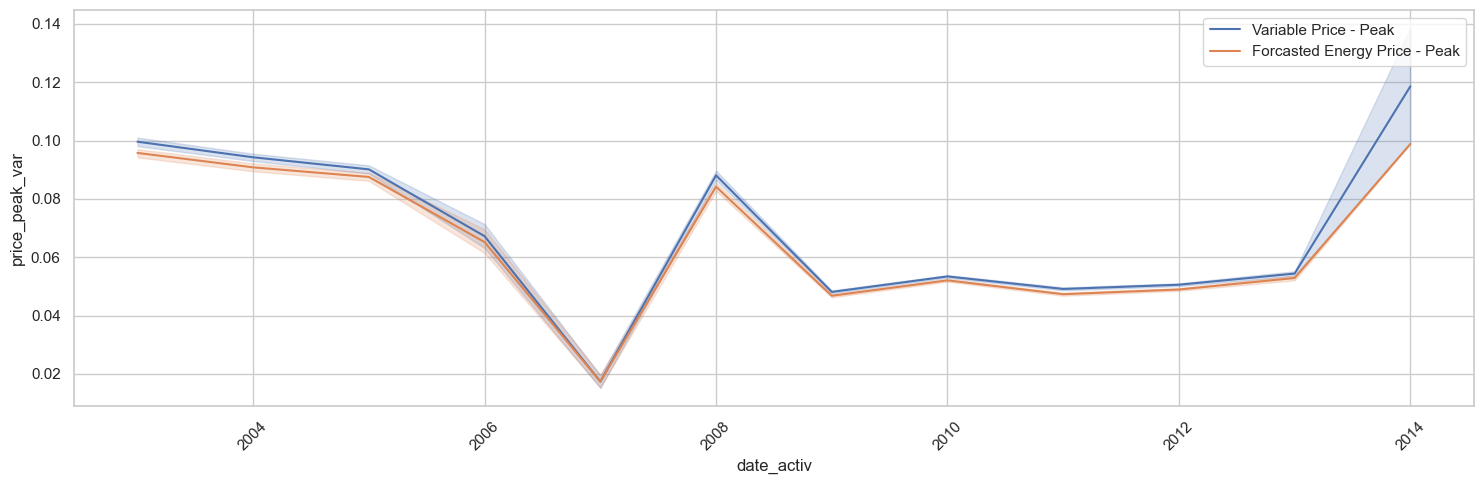

In [45]:
plt.figure(figsize=(15,5))
sns.lineplot(data=merged_df, x=merged_df['date_activ'].dt.year, y='price_peak_var', label='Variable Price - Peak')
sns.lineplot(data=merged_df, x=merged_df['date_activ'].dt.year, y='forecast_price_energy_peak', label='Forcasted Energy Price - Peak')

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

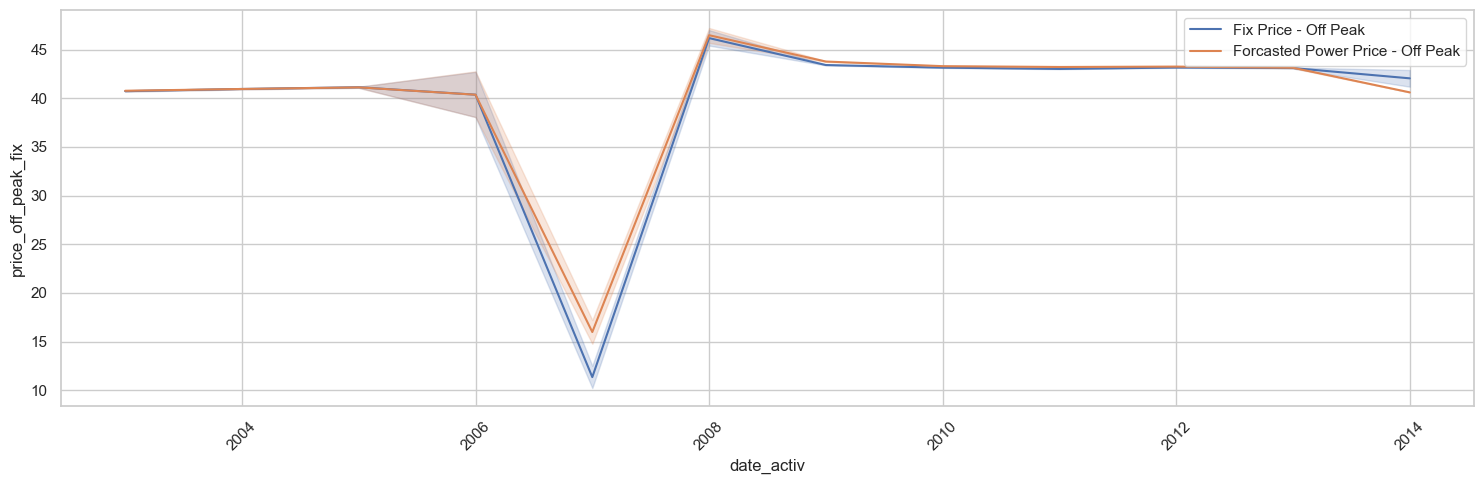

In [46]:
plt.figure(figsize=(15,5))
sns.lineplot(data=merged_df, x=merged_df['date_activ'].dt.year, y='price_off_peak_fix', label='Fix Price - Off Peak')
sns.lineplot(data=merged_df, x=merged_df['date_activ'].dt.year, y='forecast_price_pow_off_peak', label='Forcasted Power Price - Off Peak')

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

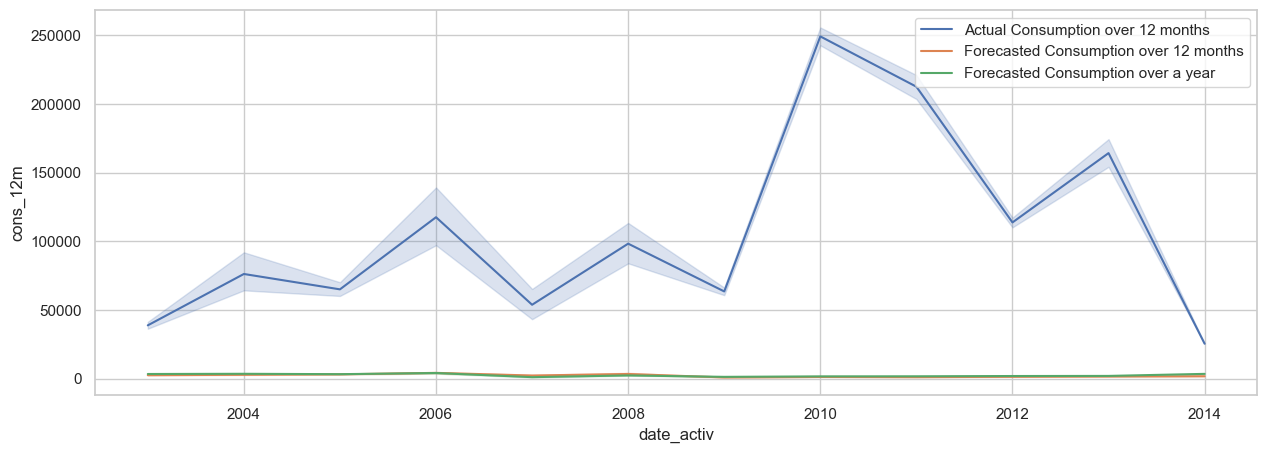

In [47]:
plt.figure(figsize=(15,5))
sns.lineplot(data=merged_df, x=merged_df['date_activ'].dt.year, y='cons_12m', label='Actual Consumption over 12 months')
sns.lineplot(data=merged_df, x=merged_df['date_activ'].dt.year, y='forecast_cons_year', label='Forecasted Consumption over 12 months')
sns.lineplot(data=merged_df, x=merged_df['date_activ'].dt.year, y='forecast_cons_12m', label='Forecasted Consumption over a year')

plt.legend(loc='upper right')

It seems like in 2013, the consumption over 12 months remarkably declining and the forecasting models seem to be diverging from the targets for price data (maybe models are hallucinating). This marks a notable year to be further analyzed.